In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
#Reading the file into a dataframe using pandas method 'read_csv'
data=pd.read_csv('weather_dataset/weatherHistory.csv')
#Displaying the read contents
data

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [21]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [22]:
data['Summary']=data['Summary'].replace('Partly Cloudy',1)
data['Summary']=data['Summary'].replace('Mostly Cloudy',2)
data['Summary']=data['Summary'].replace('Overcast',3)
data['Summary']=data['Summary'].replace('Clear',4)
data['Summary']=data['Summary'].replace('Foggy',5)
data.head(100)
data['Summary'].value_counts()

1                                      31733
2                                      28094
3                                      16597
4                                      10890
5                                       7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [23]:
data = data.drop(['Daily Summary','Apparent Temperature (C)','Loud Cover'], axis=1)
data

Formatted Date Summary Precip Type  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200       1        rain         9.472222   
1      2006-04-01 01:00:00.000 +0200       1        rain         9.355556   
2      2006-04-01 02:00:00.000 +0200       2        rain         9.377778   
3      2006-04-01 03:00:00.000 +0200       1        rain         8.288889   
4      2006-04-01 04:00:00.000 +0200       2        rain         8.755556   
...                              ...     ...         ...              ...   
96448  2016-09-09 19:00:00.000 +0200       1        rain        26.016667   
96449  2016-09-09 20:00:00.000 +0200       1        rain        24.583333   
96450  2016-09-09 21:00:00.000 +0200       1        rain        22.038889   
96451  2016-09-09 22:00:00.000 +0200       1        rain        21.522222   
96452  2016-09-09 23:00:00.000 +0200       1        rain        20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0          0.89            14.1197                   251.0          15.8263   
1          0.86            14.2646                   259.0          15.8263   
2          0.89             3.9284                   204.0          14.9569   
3          0.83            14.1036                   269.0          15.8263   
4          0.83            11.0446                   259.0          15.8263   
...         ...                ...                     ...              ...   
96448      0.43            10.9963                    31.0          16.1000   
96449      0.48            10.0947                    20.0          15.5526   
96450      0.56             8.9838                    30.0          16.1000   
96451      0.60            10.5294                    20.0          16.1000   
96452      0.61             5.8765                    39.0          15.5204   

       Pressure (millibars)  
0                   1015.13  
1                   1015.63  
2                   1015.94  
3                   1016.41  
4                   1016.51  
...                     ...  
96448               1014.36  
96449               1015.16  
96450               1015.66  
96451               1015.95  
96452               1016.16  

[96453 rows x 9 columns]

In [24]:
from datetime import datetime
import numpy as np
def discretize_date(current_date, t):
    current_date = current_date[:-10]
    cdate = datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')

    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']
for dt in date_types:
    data[dt] = data['Formatted Date'].apply(lambda x : discretize_date(x, dt))
data.drop(['Formatted Date'],axis=1,inplace=True)
data

Summary Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0           1        rain         9.472222      0.89            14.1197   
1           1        rain         9.355556      0.86            14.2646   
2           2        rain         9.377778      0.89             3.9284   
3           1        rain         8.288889      0.83            14.1036   
4           2        rain         8.755556      0.83            11.0446   
...       ...         ...              ...       ...                ...   
96448       1        rain        26.016667      0.43            10.9963   
96449       1        rain        24.583333      0.48            10.0947   
96450       1        rain        22.038889      0.56             8.9838   
96451       1        rain        21.522222      0.60            10.5294   
96452       1        rain        20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                       251.0          15.8263               1015.13   
1                       259.0          15.8263               1015.63   
2                       204.0          14.9569               1015.94   
3                       269.0          15.8263               1016.41   
4                       259.0          15.8263               1016.51   
...                       ...              ...                   ...   
96448                    31.0          16.1000               1014.36   
96449                    20.0          15.5526               1015.16   
96450                    30.0          16.1000               1015.66   
96451                    20.0          16.1000               1015.95   
96452                    39.0          15.5204               1016.16   

       hour_sin  hour_cos   day_sin   day_cos  
0      0.000000  1.000000  0.999991  0.004304  
1      0.258819  0.965926  0.999991  0.004304  
2      0.500000  0.866025  0.999991  0.004304  
3      0.707107  0.707107  0.999991  0.004304  
4      0.866025  0.500000  0.999991  0.004304  
...         ...       ...       ...       ...  
96448 -0.965926  0.258819 -0.936881 -0.349647  
96449 -0.866025  0.500000 -0.936881 -0.349647  
96450 -0.707107  0.707107 -0.936881 -0.349647  
96451 -0.500000  0.866025 -0.936881 -0.349647  
96452 -0.258819  0.965926 -0.936881 -0.349647  

[96453 rows x 12 columns]

In [25]:
dataset = pd.DataFrame(data.columns)
#Add column with the price (target).
dataset

0
0                  Summary
1              Precip Type
2          Temperature (C)
3                 Humidity
4        Wind Speed (km/h)
5   Wind Bearing (degrees)
6          Visibility (km)
7     Pressure (millibars)
8                 hour_sin
9                 hour_cos
10                 day_sin
11                 day_cos

In [26]:
summary_types = [1,2,3,4,5]
condition = data["Summary"].isin(summary_types)
new=data[condition]
new['Summary'].value_counts()


1    31733
2    28094
3    16597
4    10890
5     7148
Name: Summary, dtype: int64

In [27]:
#new.to_csv('weather_dataset/weatherHistory_new.csv', index=False)


In [28]:
#new1.loc[:, 'Precip Type'] = new1['Precip Type'].replace({'rain':1,'snow':0}) #method 1
new.isetitem(1,  new['Precip Type'].replace({'rain':1,'snow':0}))            #method 2
#new1[new1.columns[1]] = new1['Precip Type'].replace({'rain':1,'snow':0})      #method 3
new['Summary'] = new['Summary'].astype(float)

new.dtypes


C:\Users\arham\AppData\Local\Temp\ipykernel_10644\1096049131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Summary'] = new['Summary'].astype(float)


Summary                   float64
Precip Type               float64
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
hour_sin                  float64
hour_cos                  float64
day_sin                   float64
day_cos                   float64
dtype: object

In [29]:
new['Summary'].value_counts()

1.0    31733
2.0    28094
3.0    16597
4.0    10890
5.0     7148
Name: Summary, dtype: int64

In [30]:
new.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
hour_sin                    0
hour_cos                    0
day_sin                     0
day_cos                     0
dtype: int64

In [31]:
new['Precip Type'].value_counts()

1.0    83365
0.0    10580
Name: Precip Type, dtype: int64

In [32]:
new['Precip Type'].fillna(method='ffill', inplace=True)

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\3193983962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Precip Type'].fillna(method='ffill', inplace=True)


In [33]:
new.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
hour_sin                  0
hour_cos                  0
day_sin                   0
day_cos                   0
dtype: int64

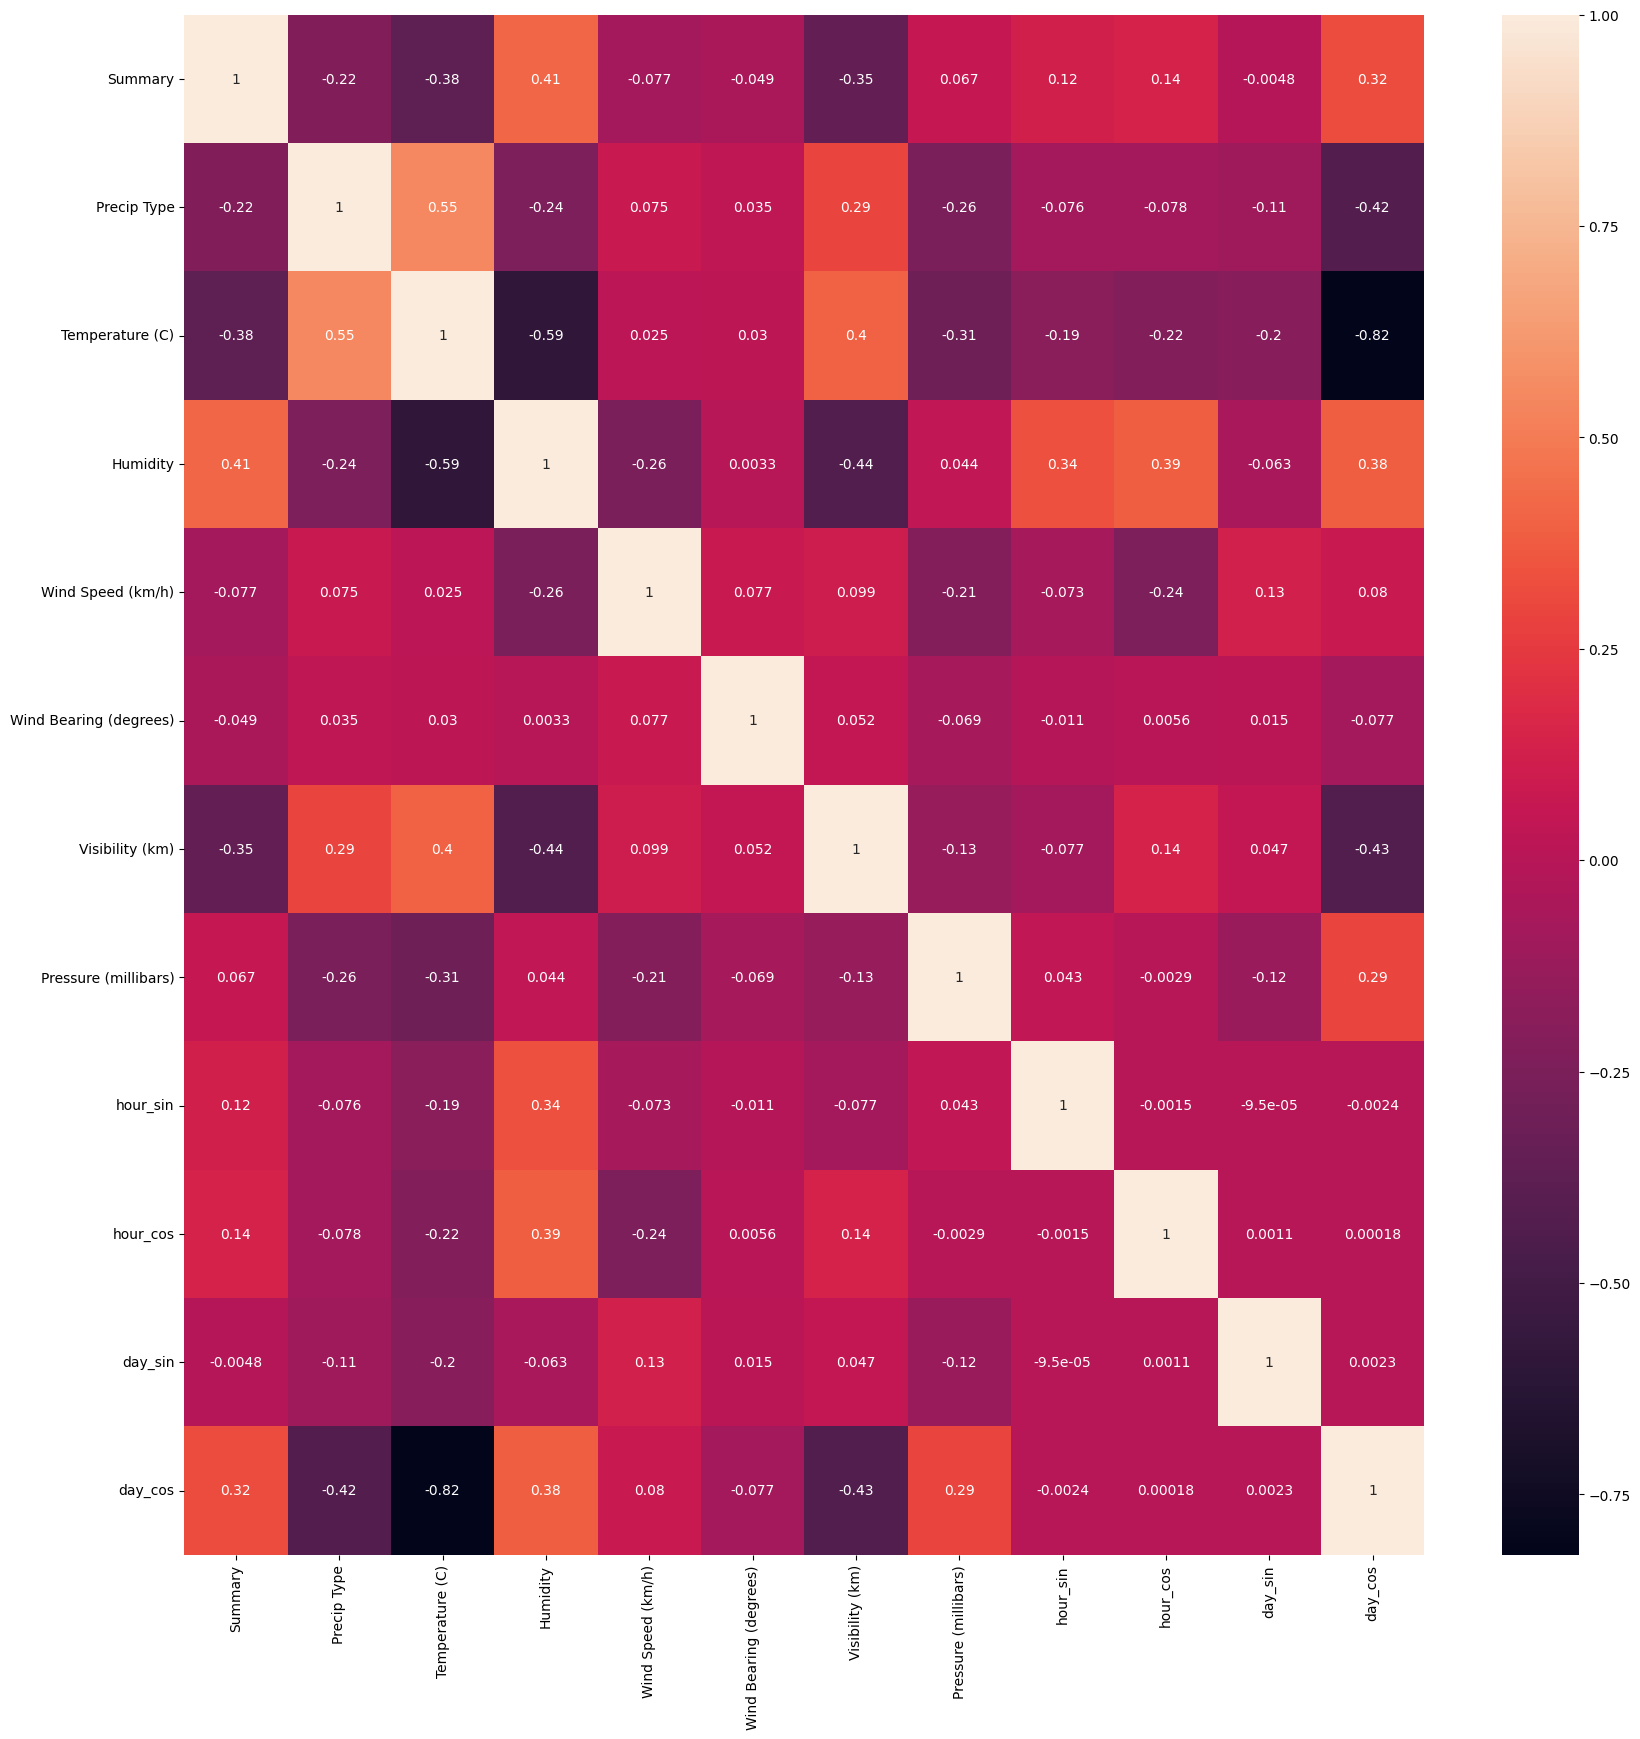

In [34]:
corrmat = new.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<Axes: >

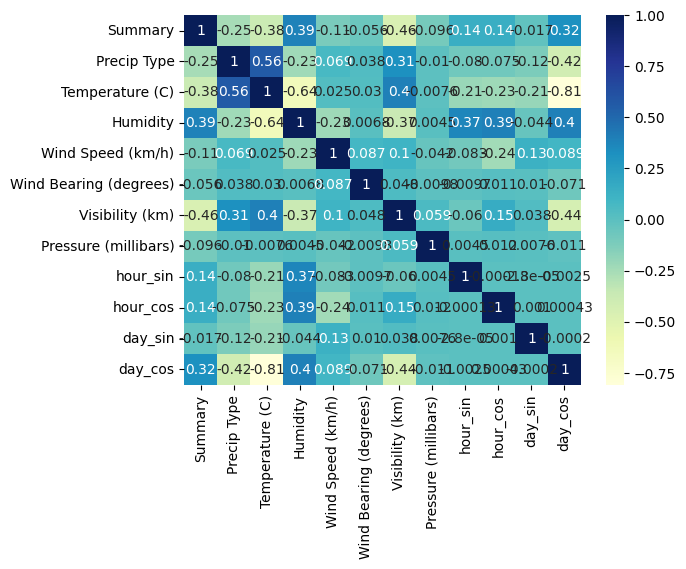

In [35]:
sns.heatmap(new.corr(), annot=True, cmap="YlGnBu")

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Precip Type'] = new['Precip Type'].astype(int)
C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


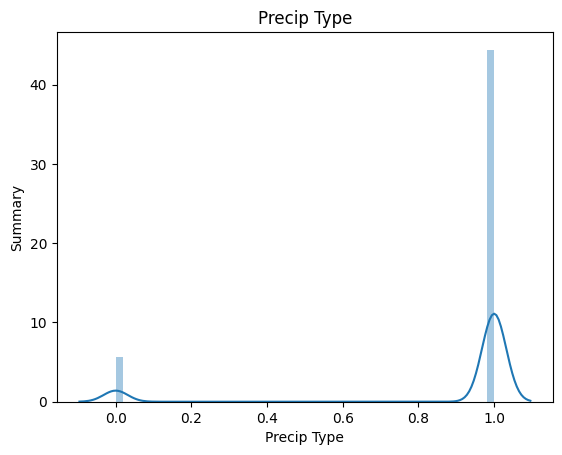

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


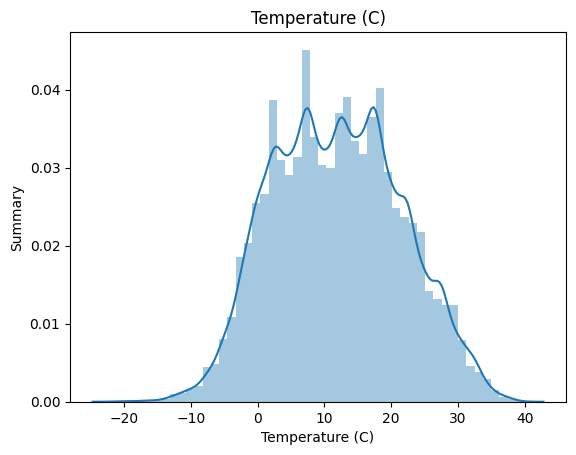

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


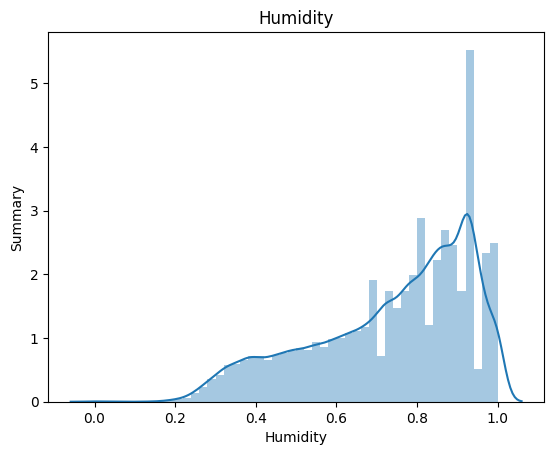

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


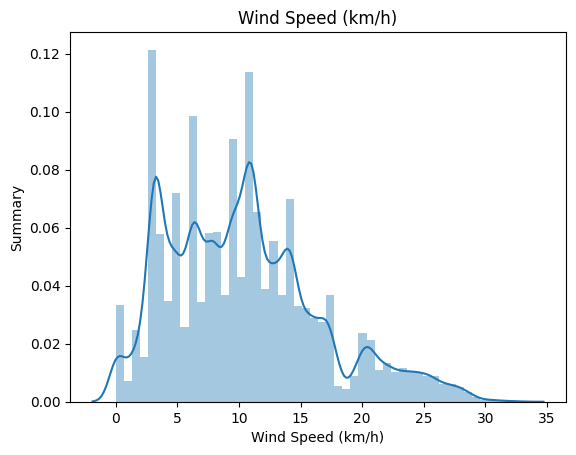

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


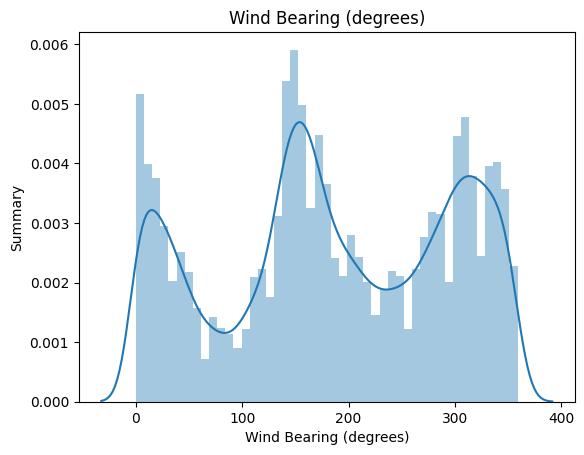

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


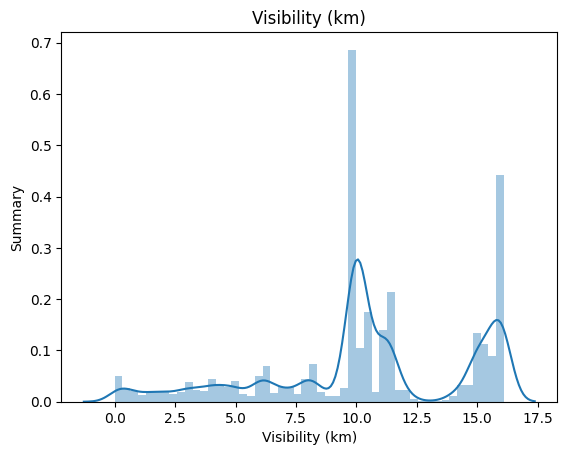

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


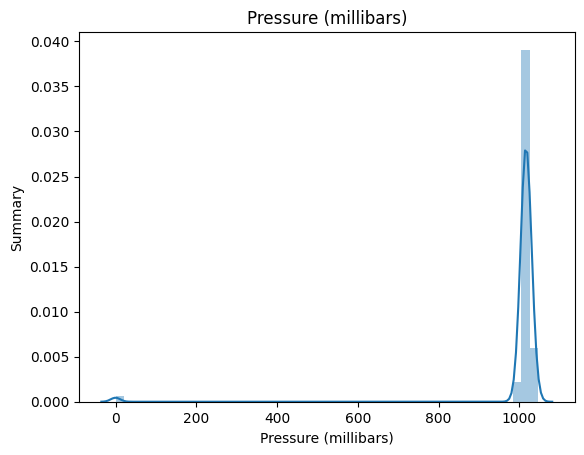

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


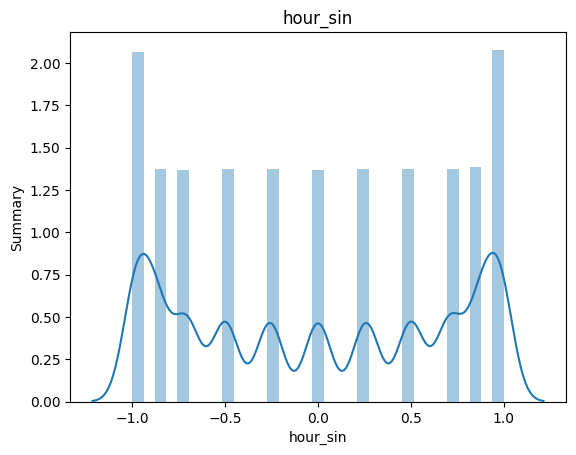

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


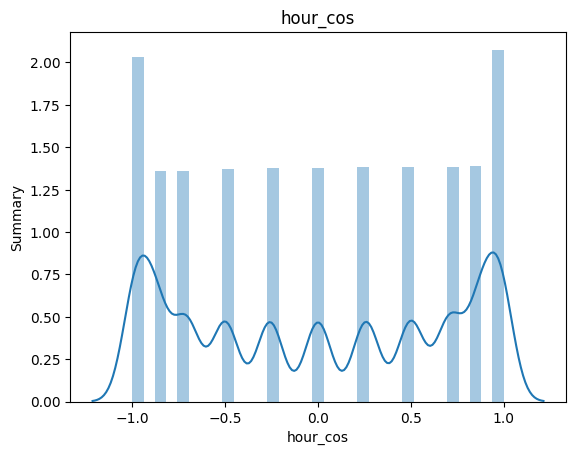

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


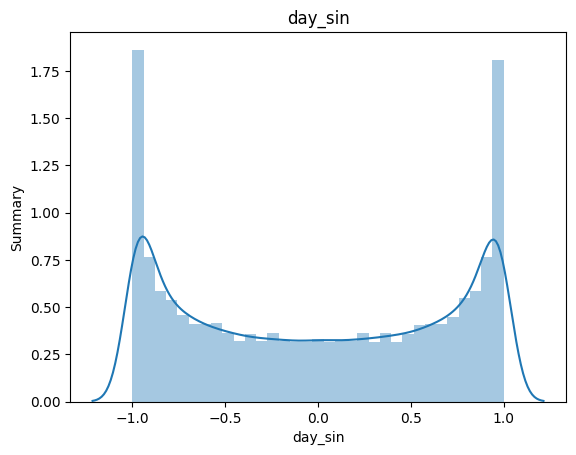

<Figure size 1500x1500 with 0 Axes>

C:\Users\arham\AppData\Local\Temp\ipykernel_10644\272216759.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


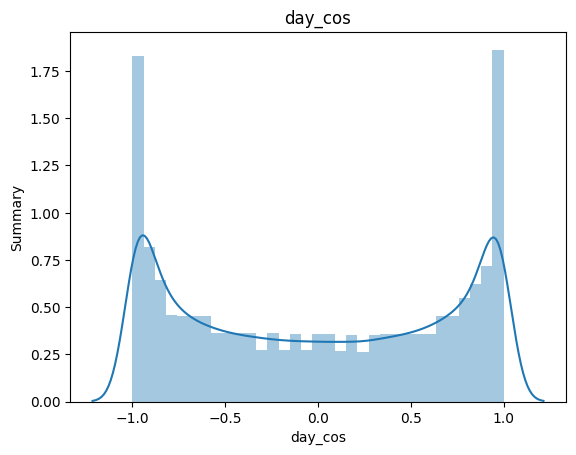

<Figure size 1500x1500 with 0 Axes>

In [36]:
new['Precip Type'] = new['Precip Type'].astype(int)
column_views=new.columns
column_views[1:]
for feature in column_views[1:]:

    sns.distplot(new[feature])
    plt.xlabel(feature)
    plt.ylabel('Summary')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()


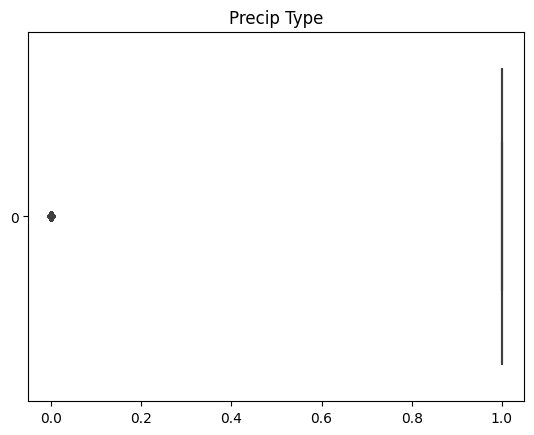

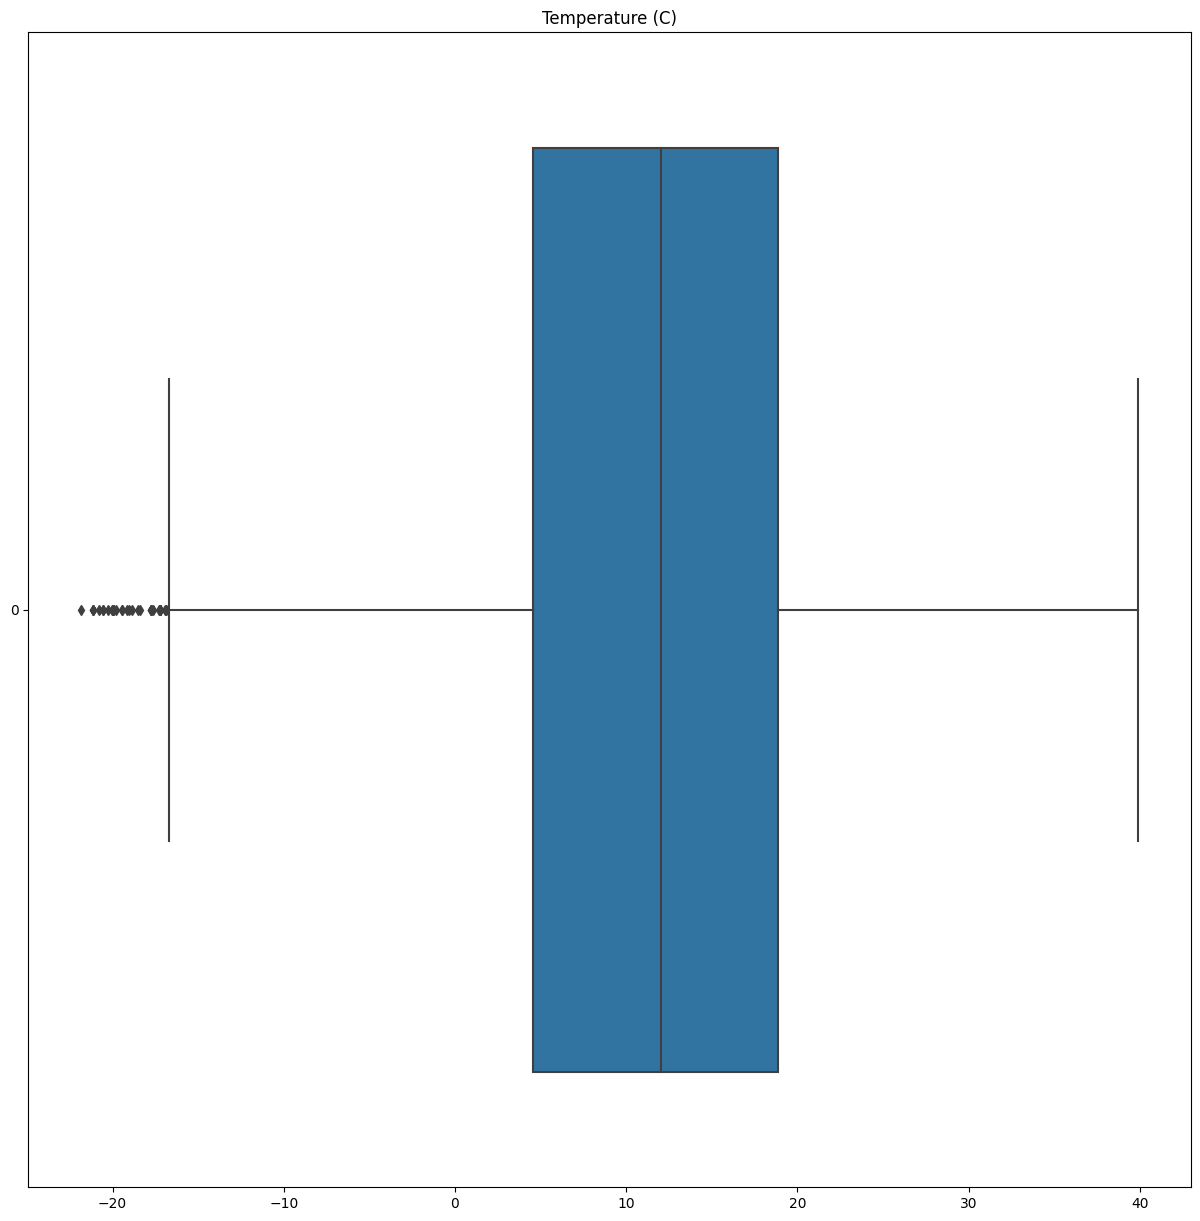

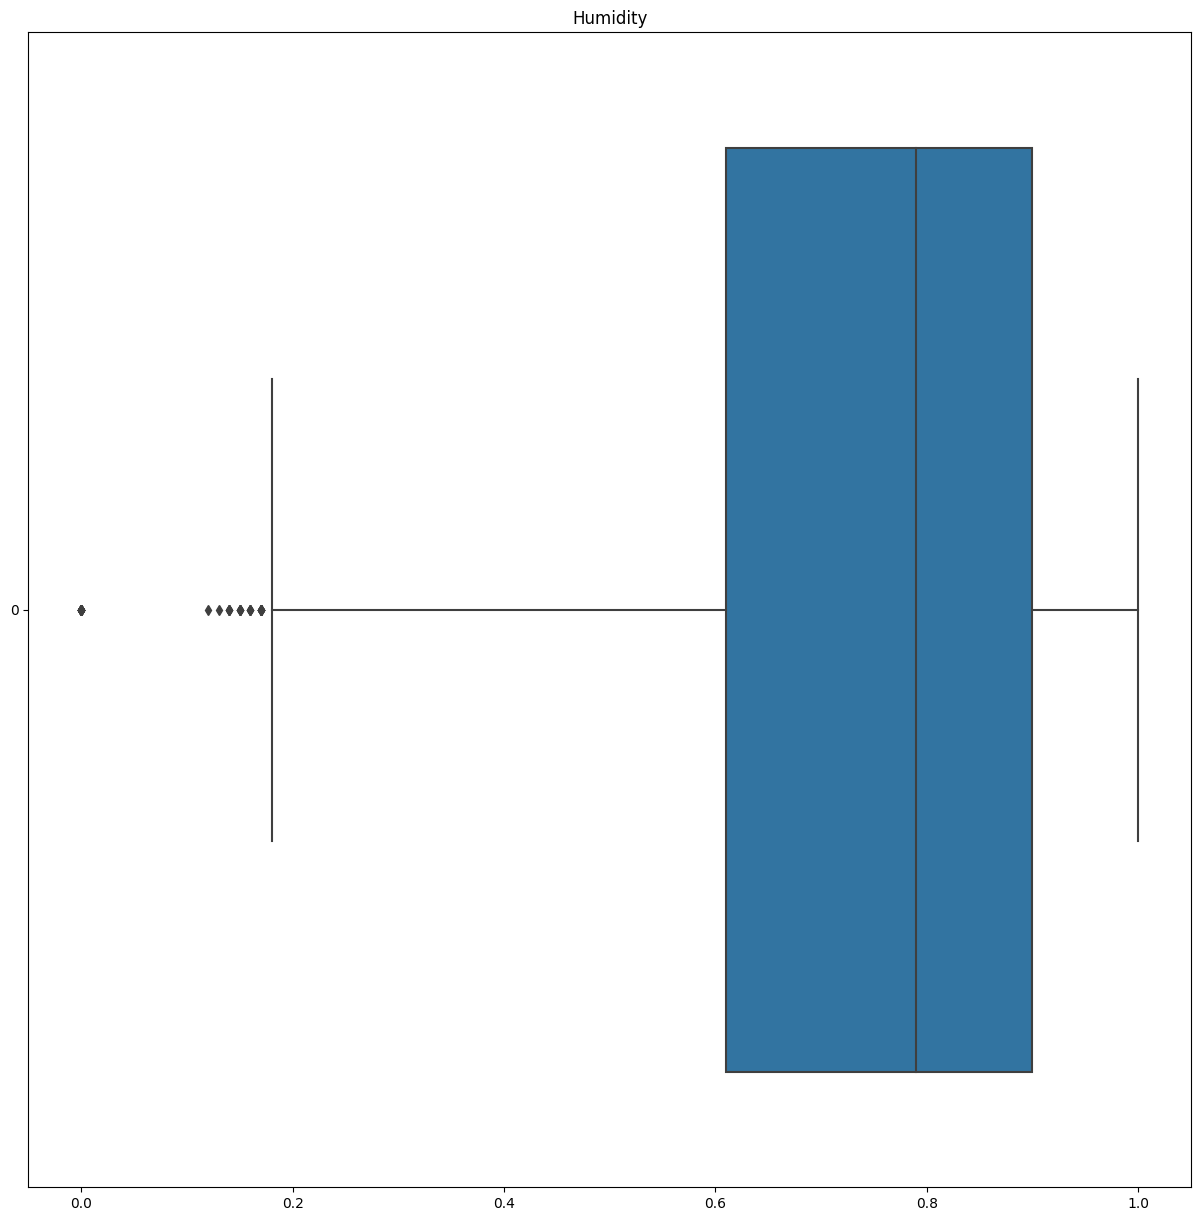

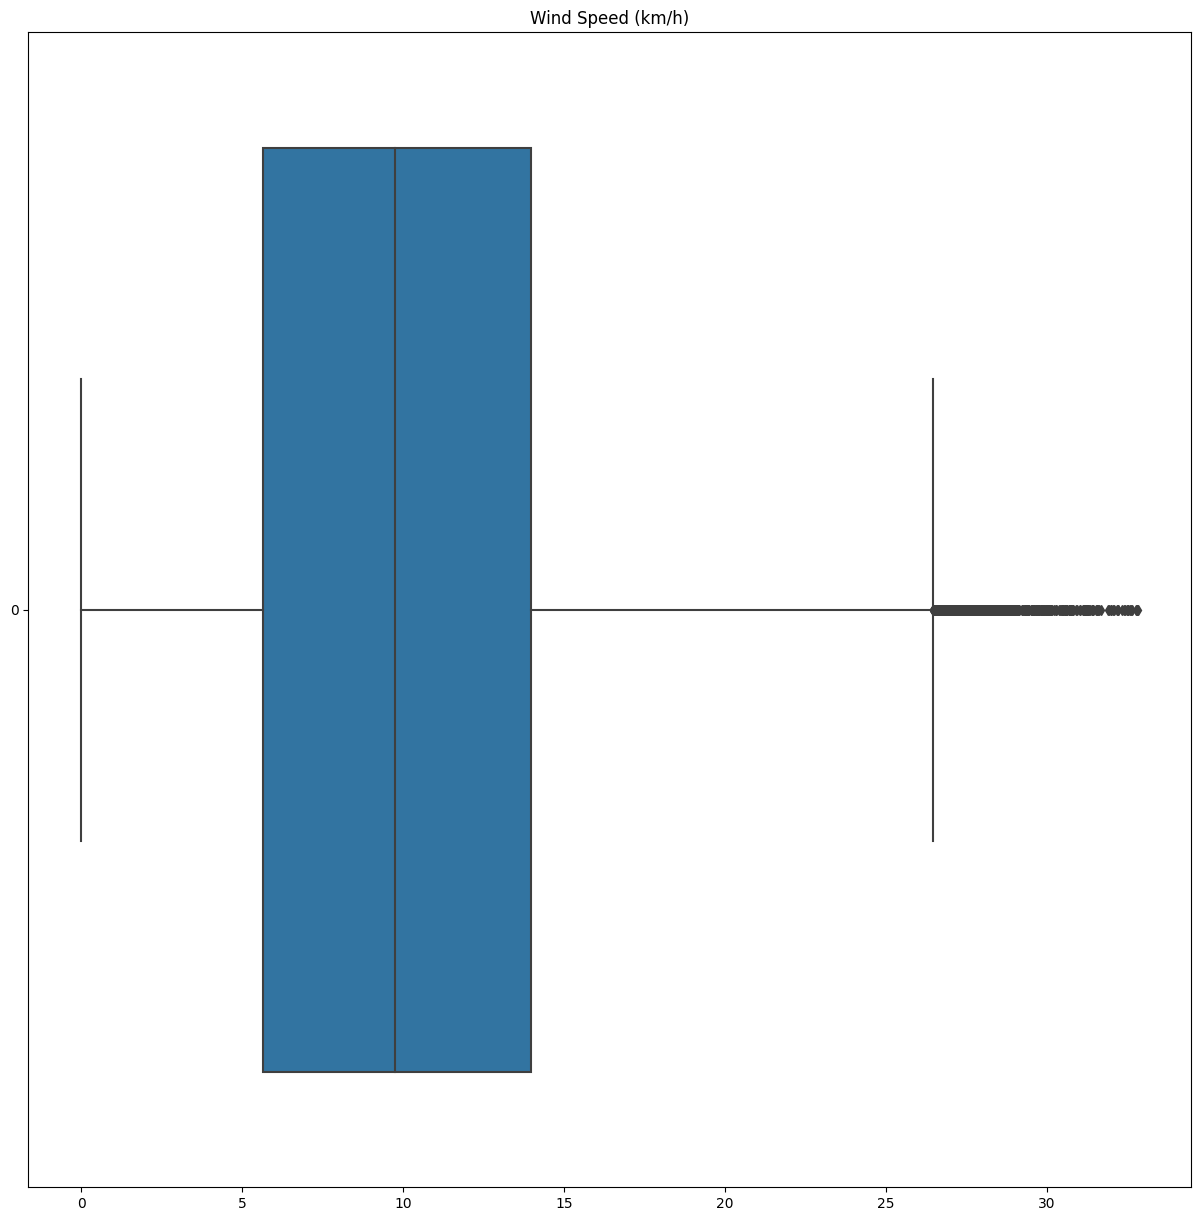

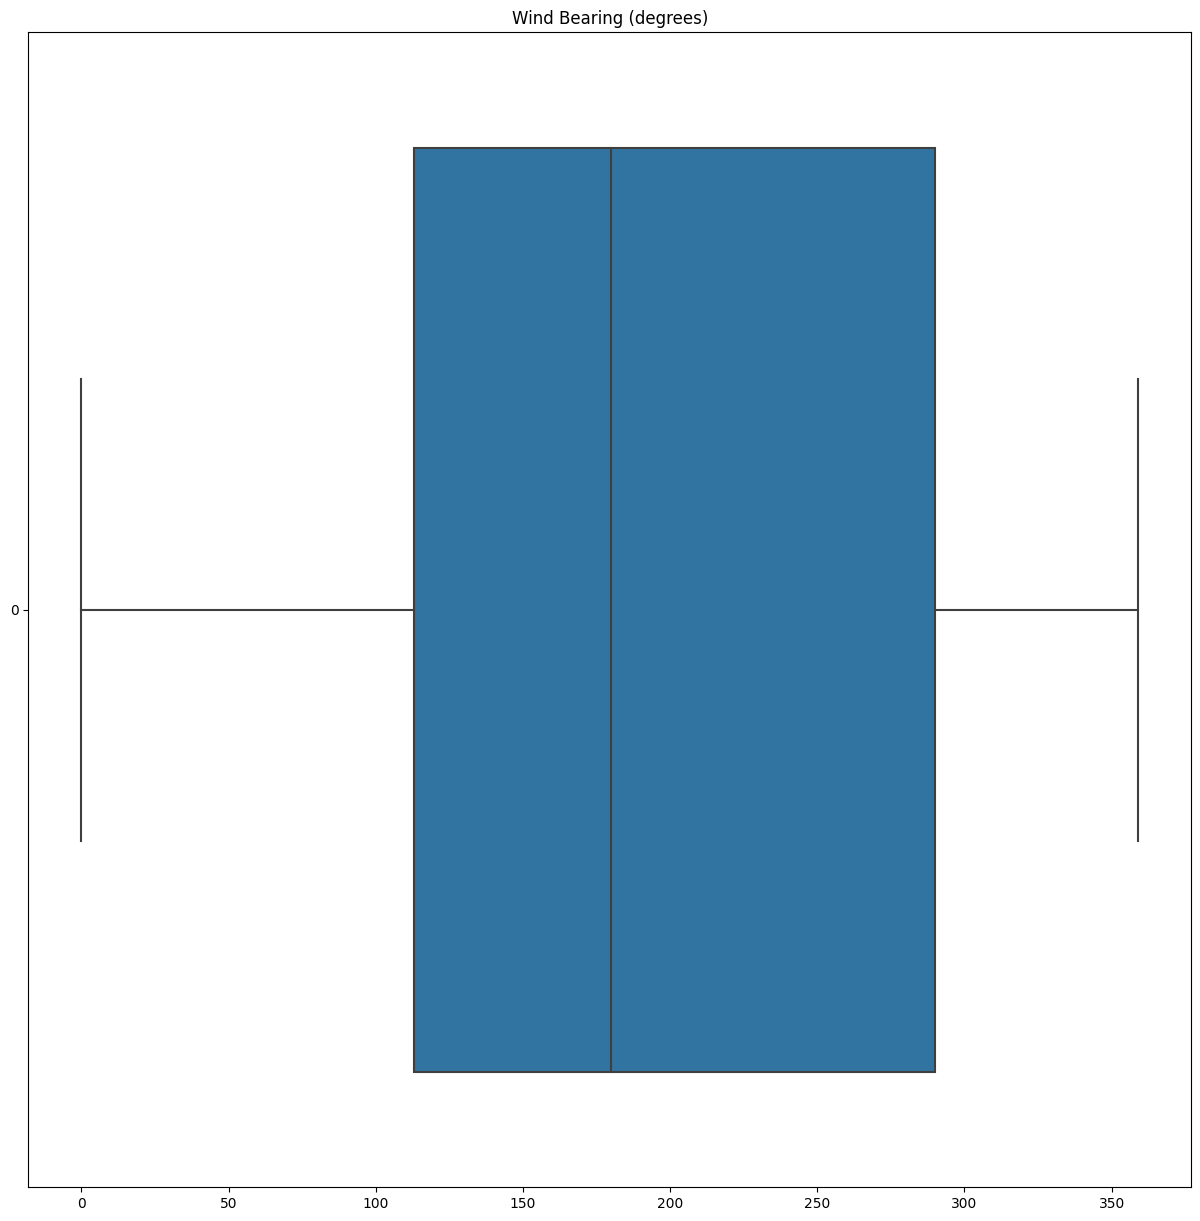

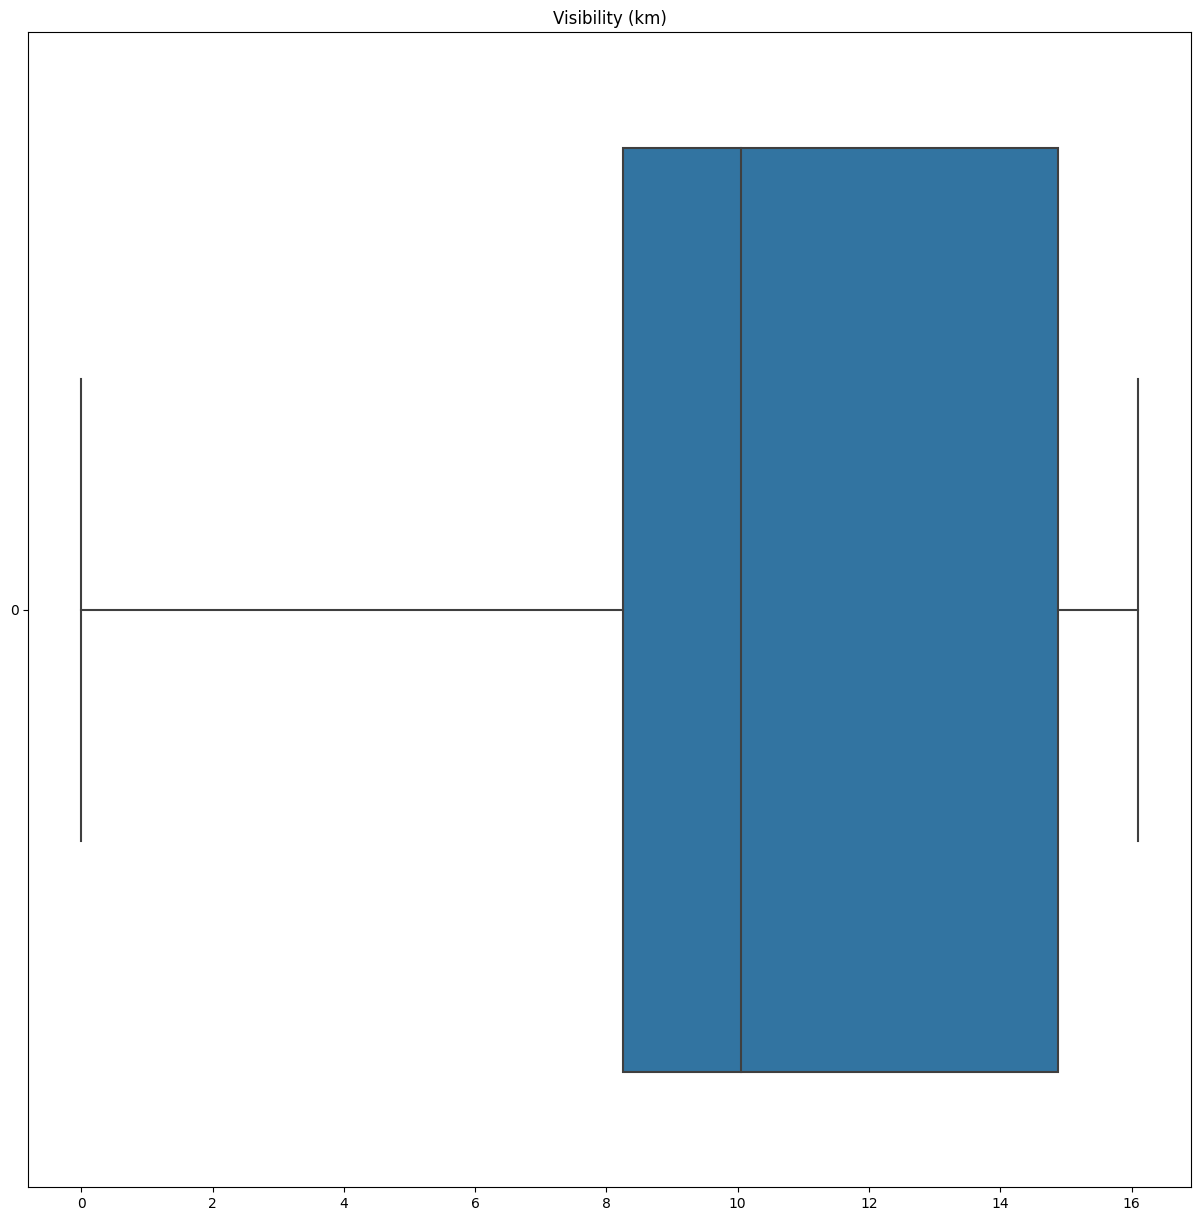

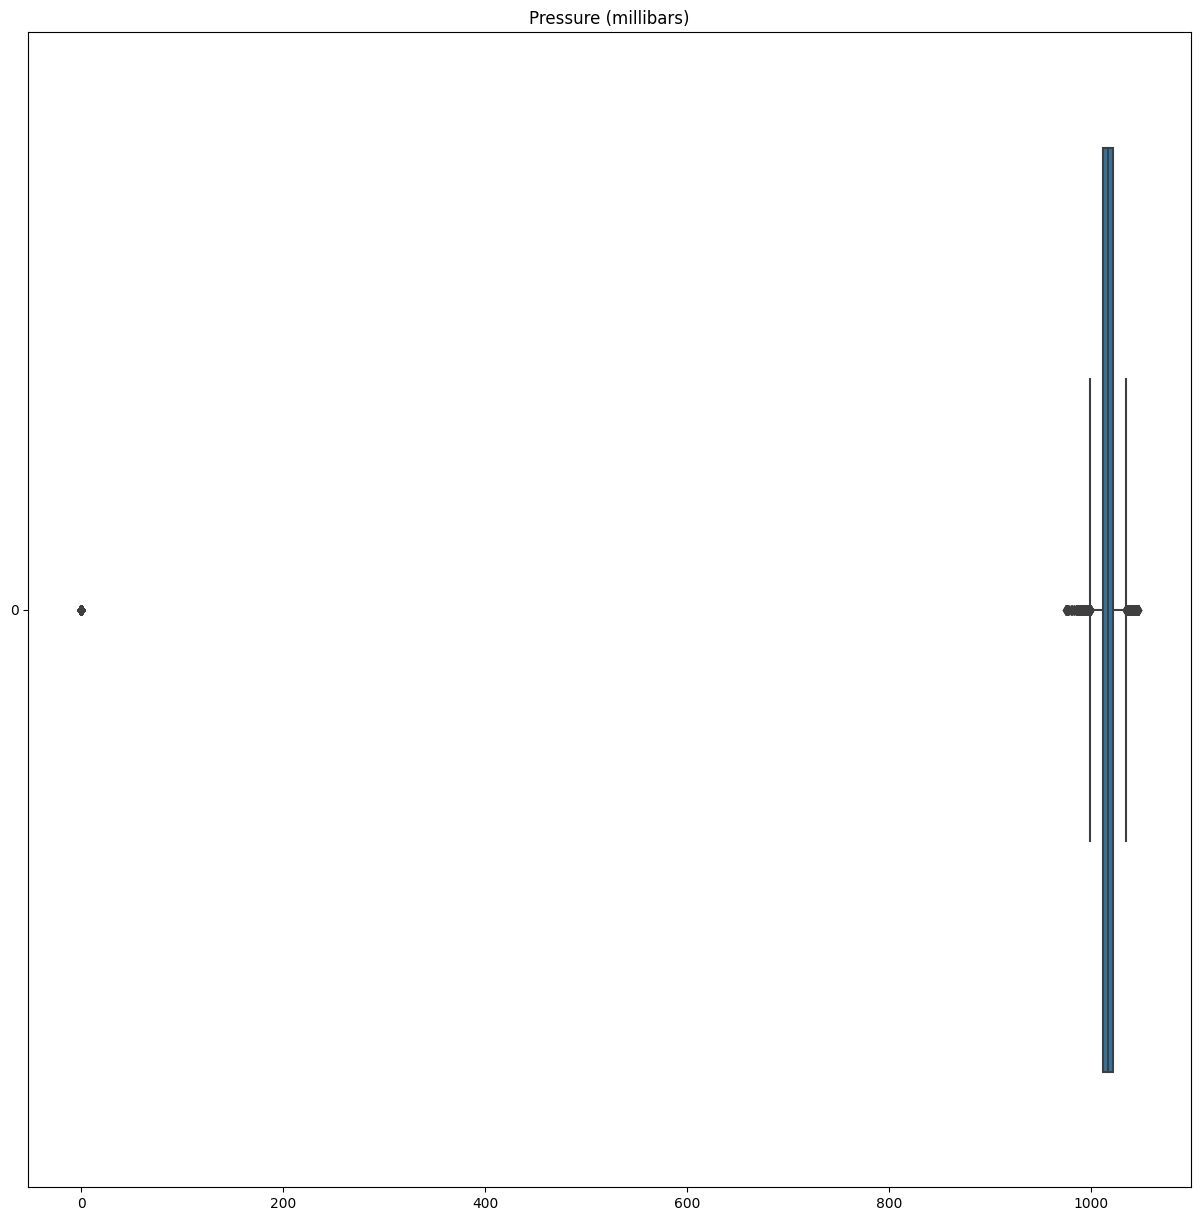

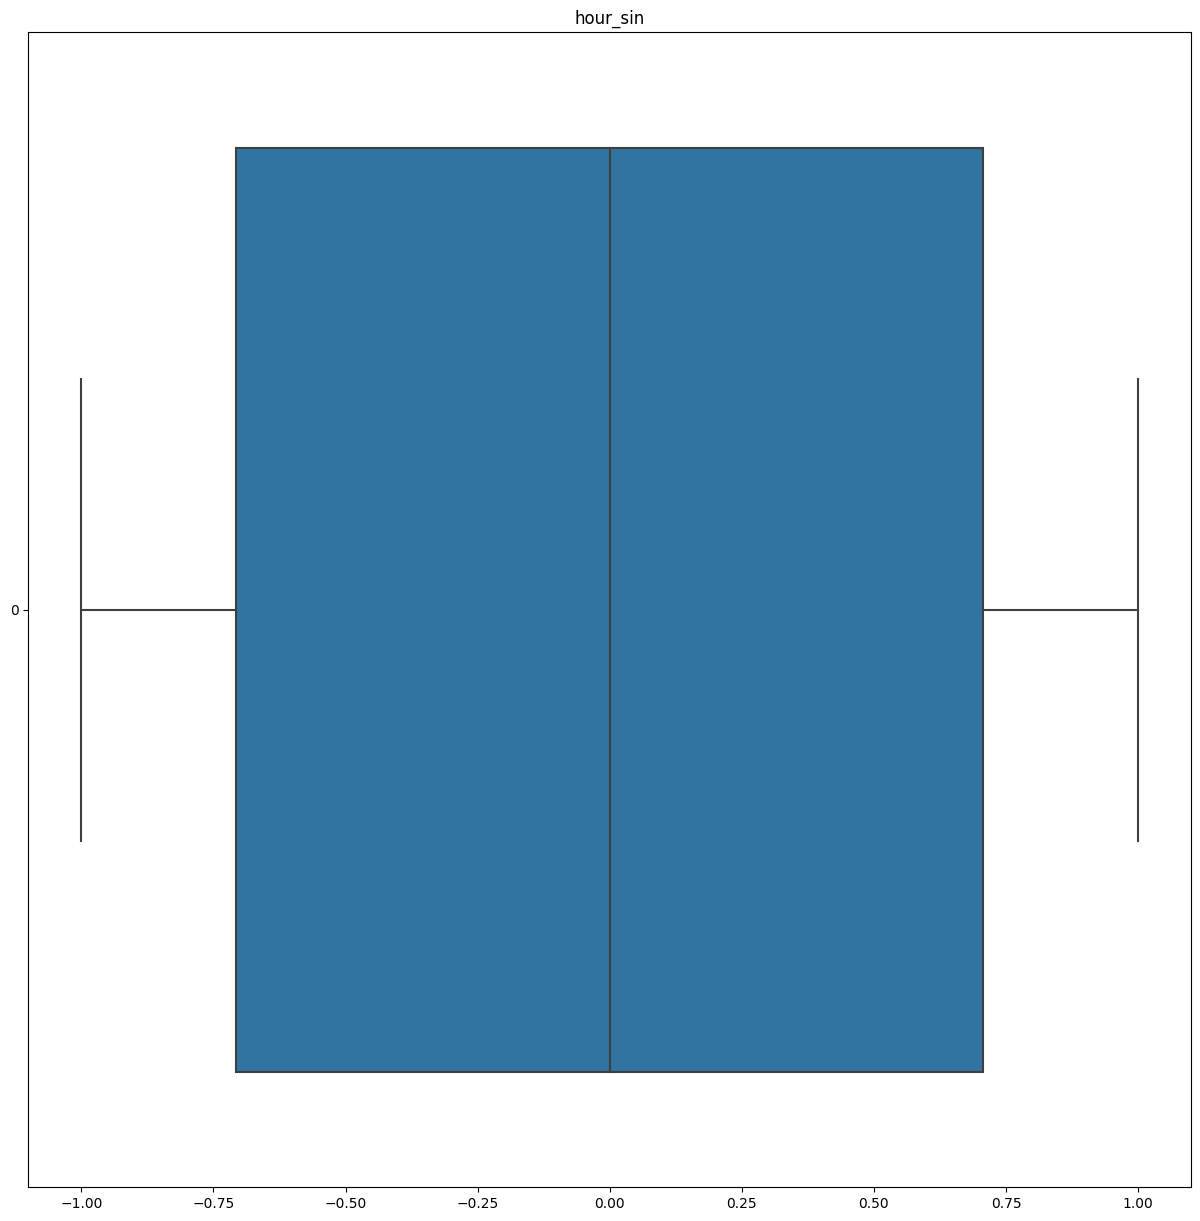

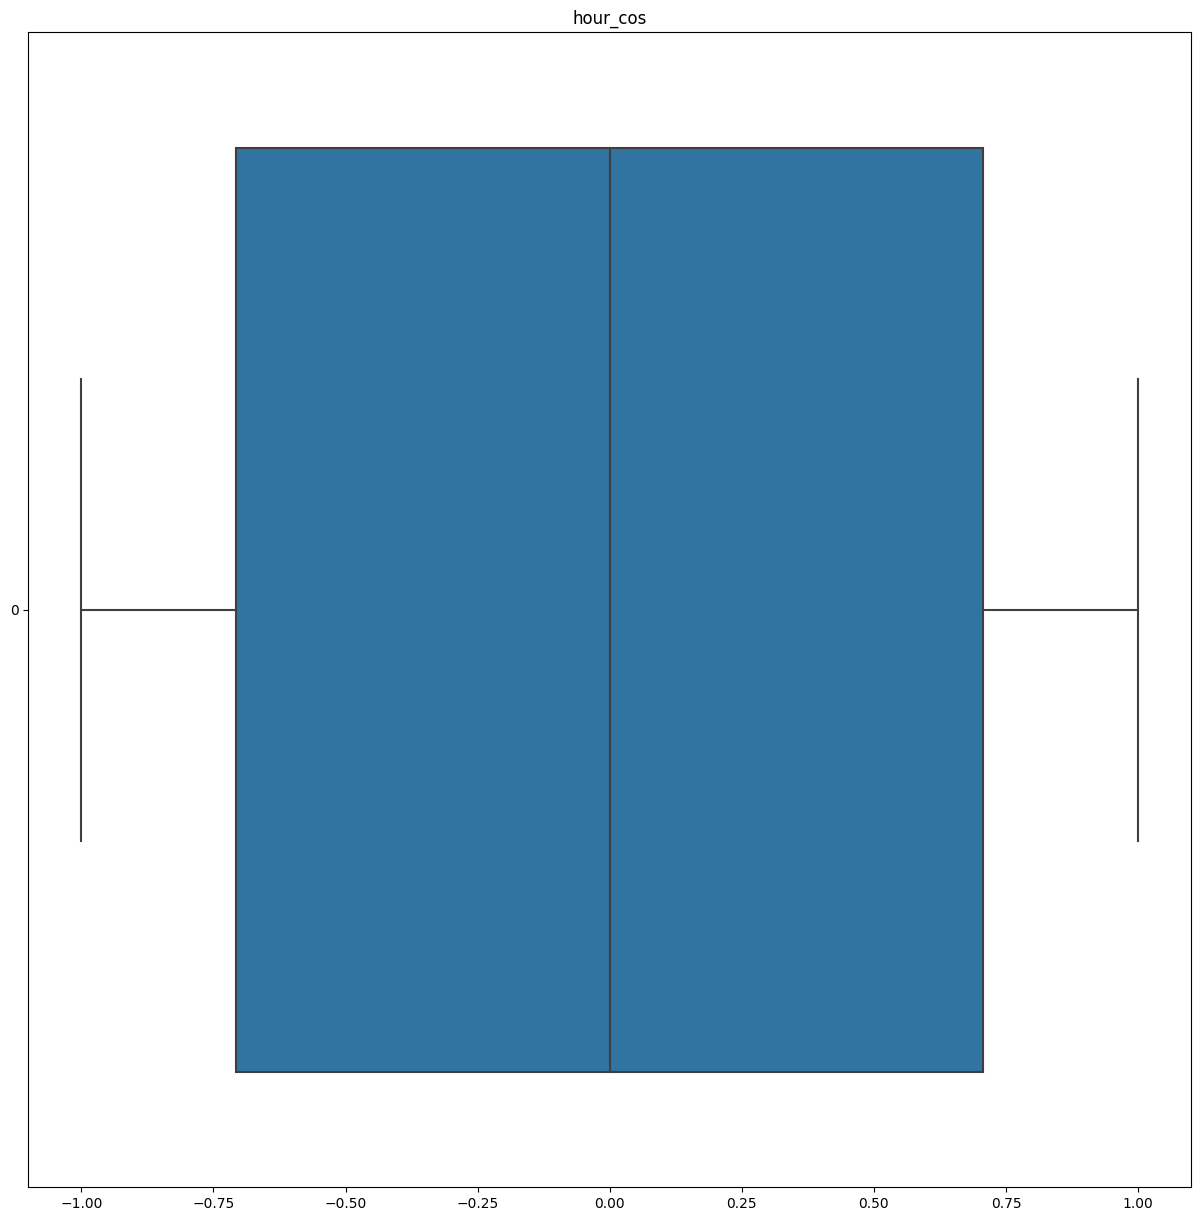

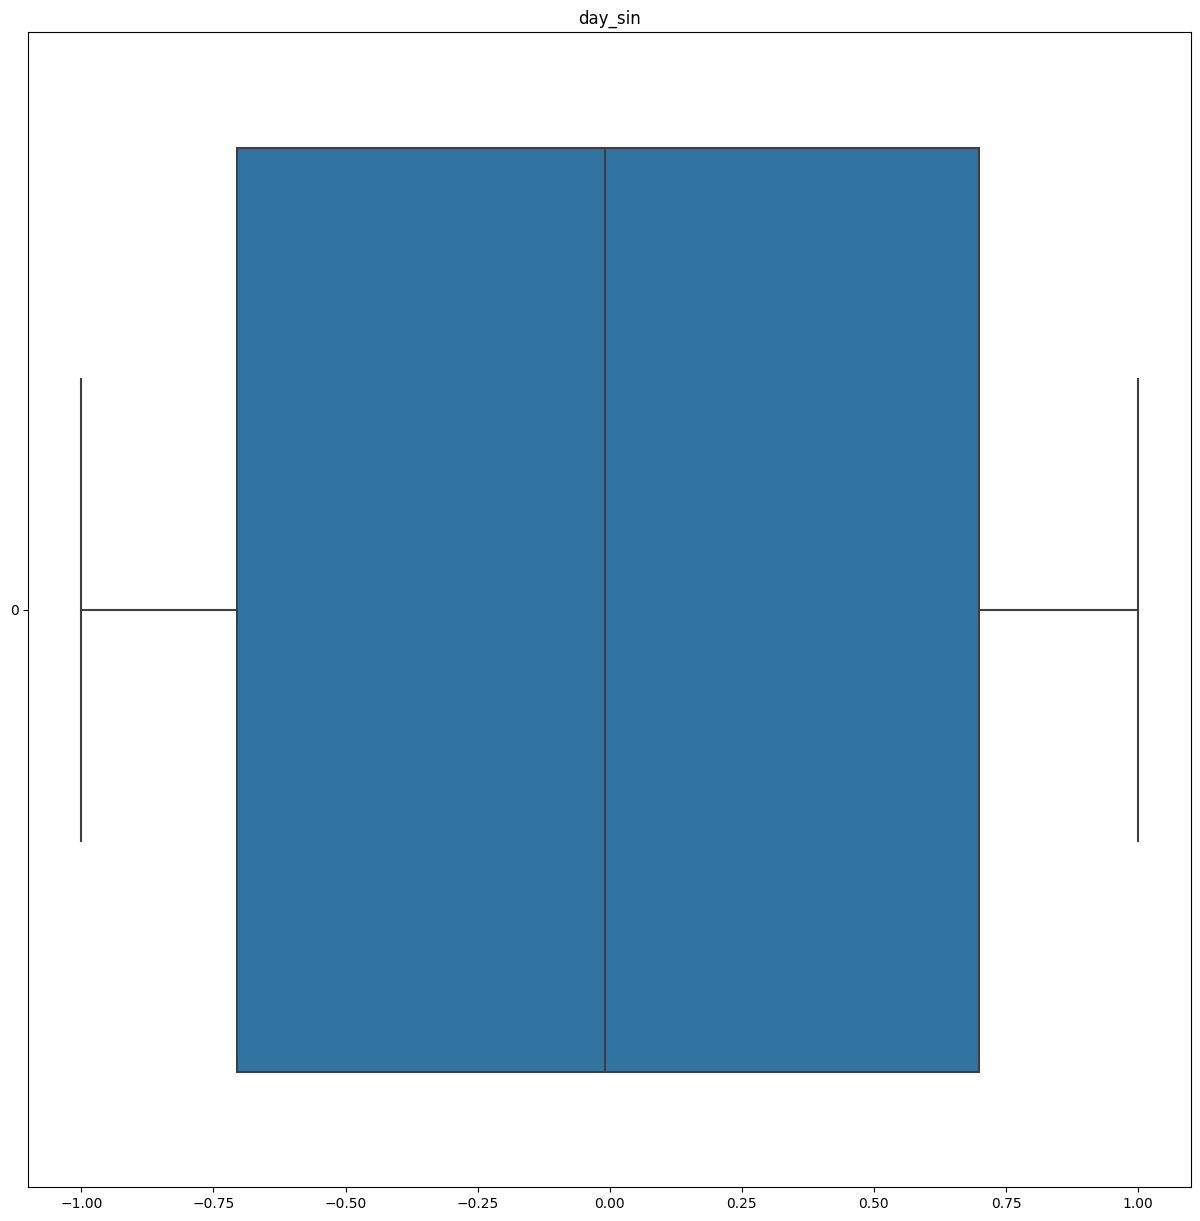

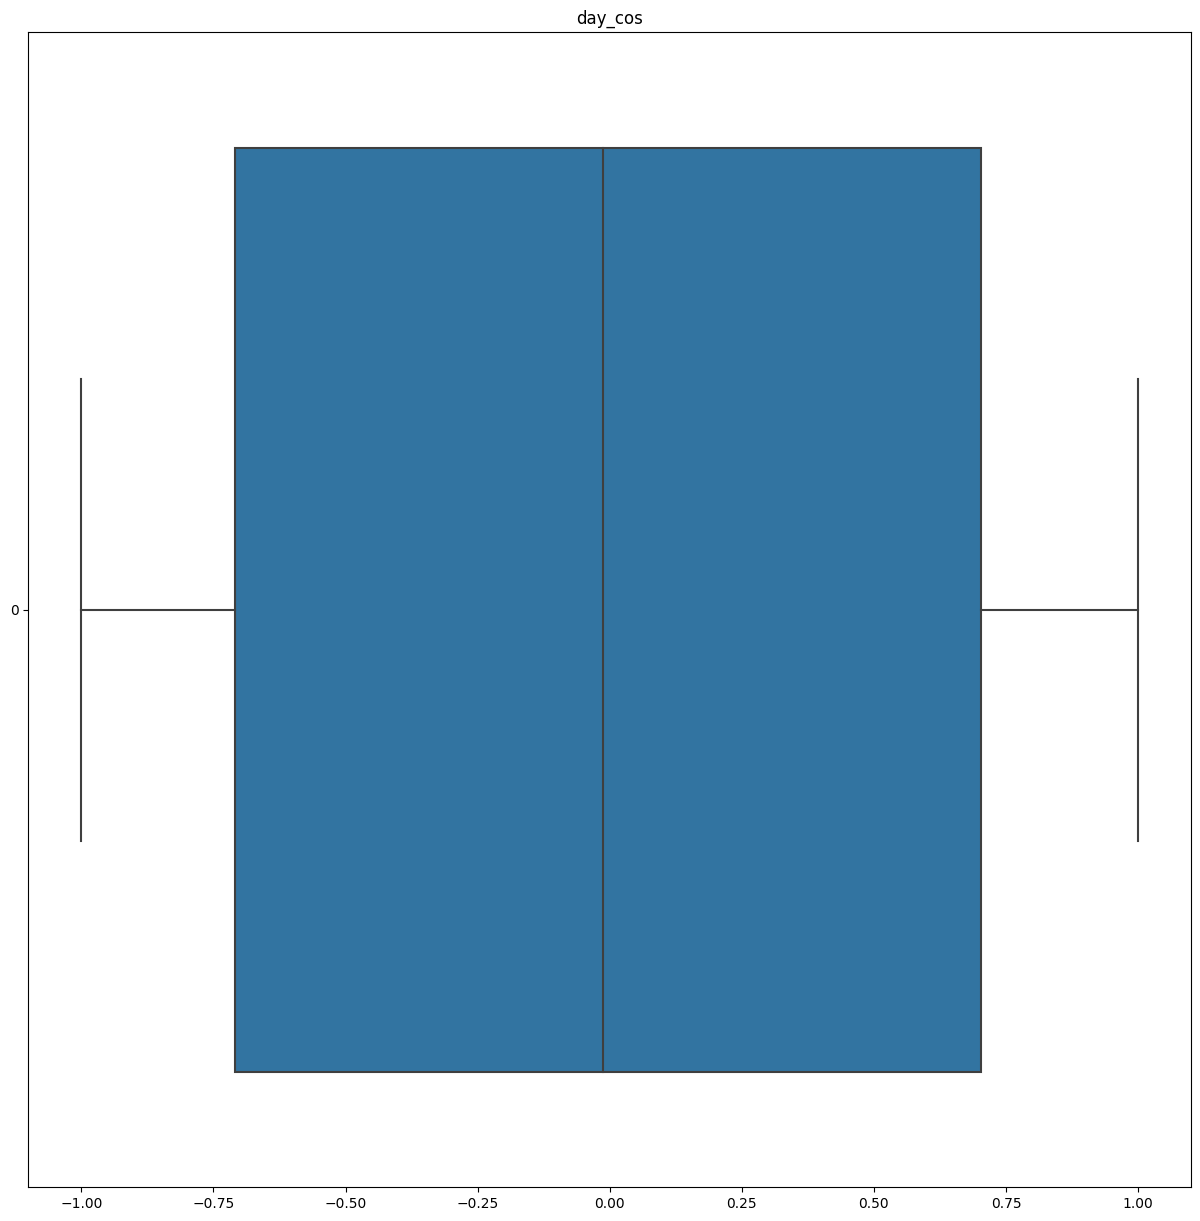

<Figure size 1500x1500 with 0 Axes>

In [37]:
for feature in column_views[1:]: 
    sns.boxplot(new[feature], orient='h')
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [38]:
new.dtypes

Summary                   float64
Precip Type                 int32
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
hour_sin                  float64
hour_cos                  float64
day_sin                   float64
day_cos                   float64
dtype: object

In [39]:
for feature in column_views[2:]:  
    IQR=new[feature].quantile(0.75)-new[feature].quantile(0.25)
    lower_bridge=new[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=new[feature].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    new.loc[new[feature]>=upper_bridge,feature]=upper_bridge
    new.loc[new[feature]<=lower_bridge,feature]=-lower_bridge

-16.863888888888894 40.26944444444445
0.17499999999999993 1.335
-6.83445 26.46035
-152.5 555.5
-1.6663500000000049 24.80205000000001
998.325 1034.845
-2.8284271247461907 2.8284271247461903
-2.82842712474619 2.82842712474619
-2.8131465158454145 2.807021232789884
-2.8253579069148853 2.8192587028195826


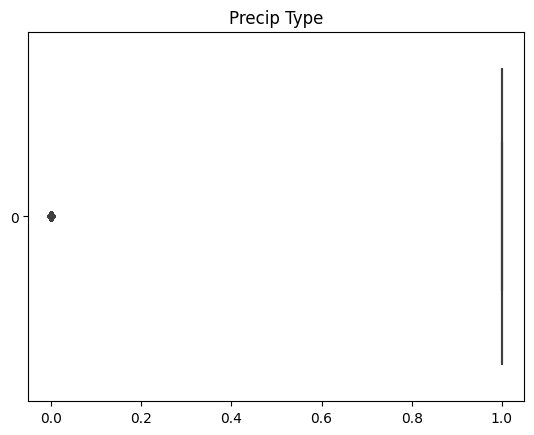

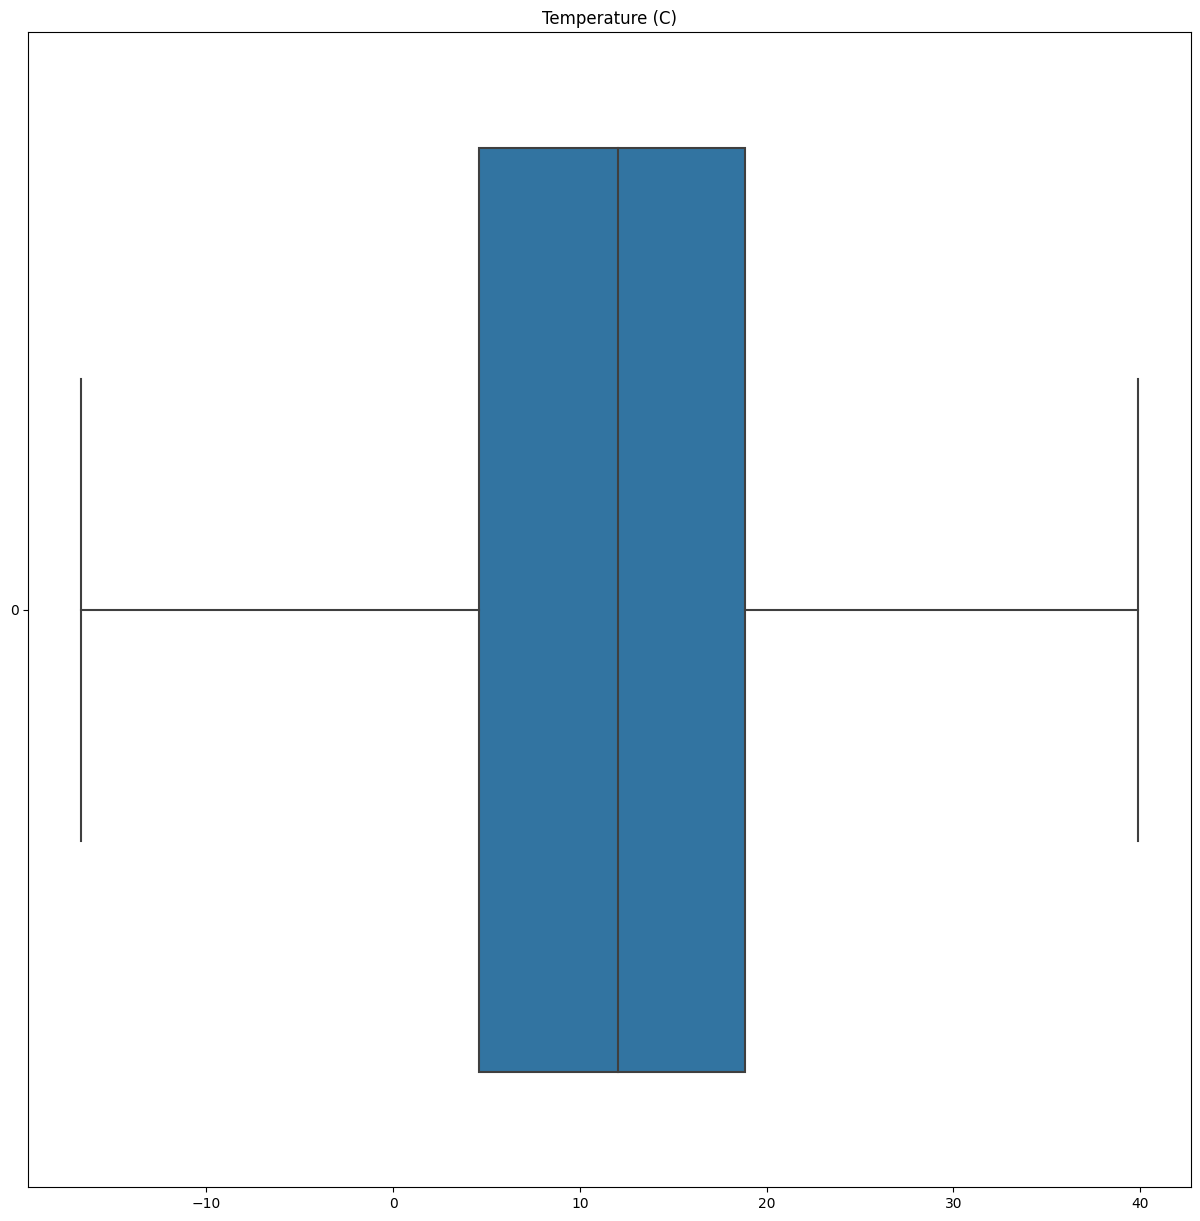

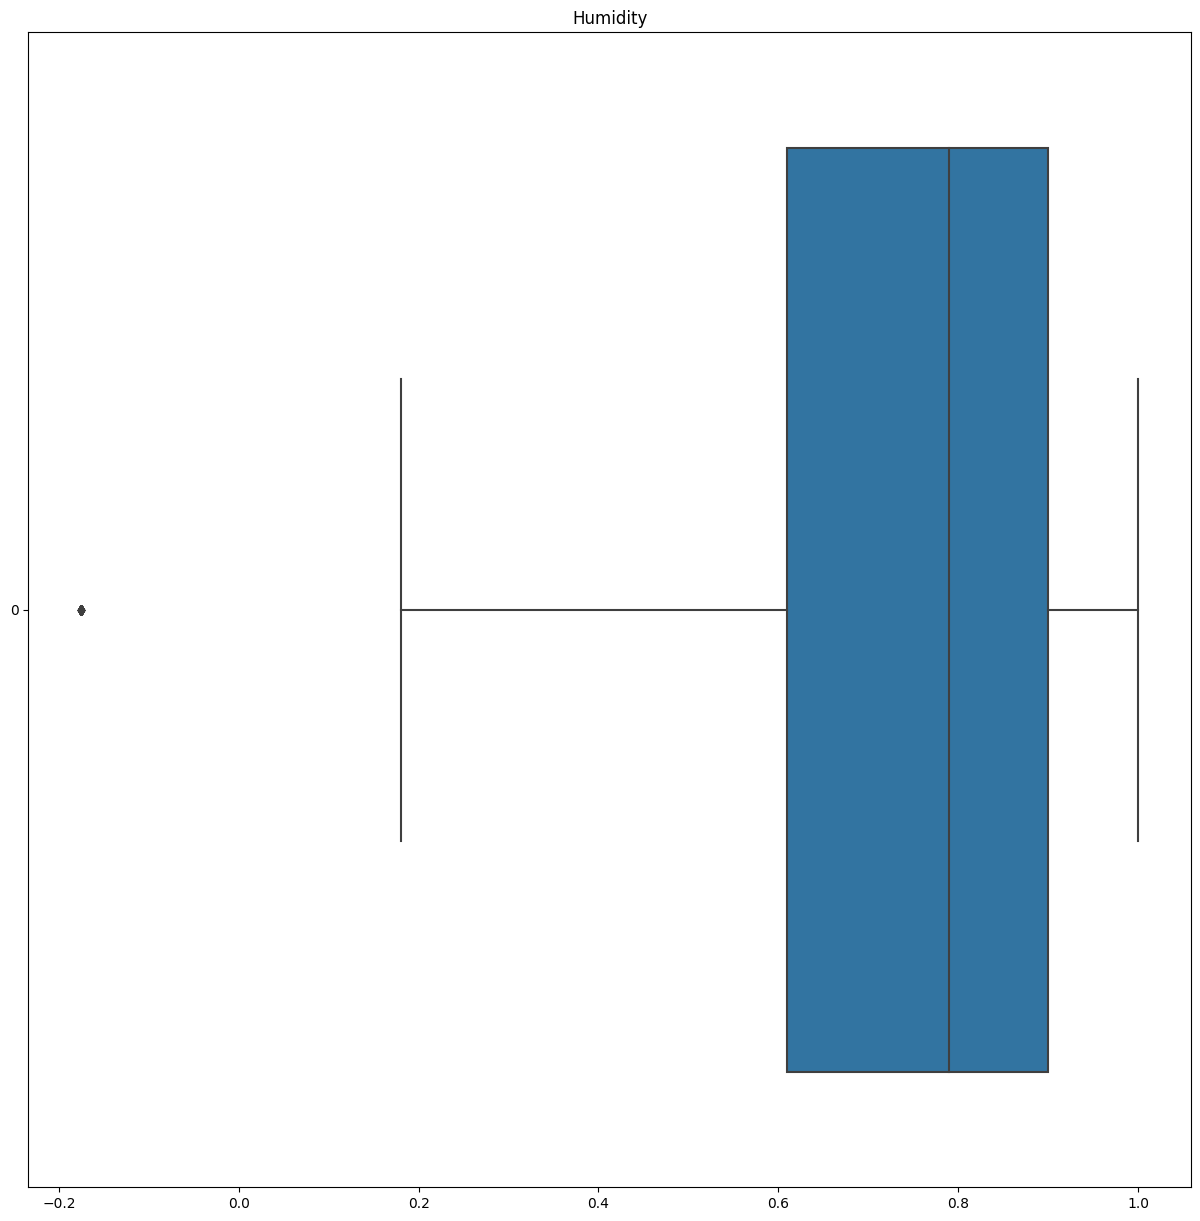

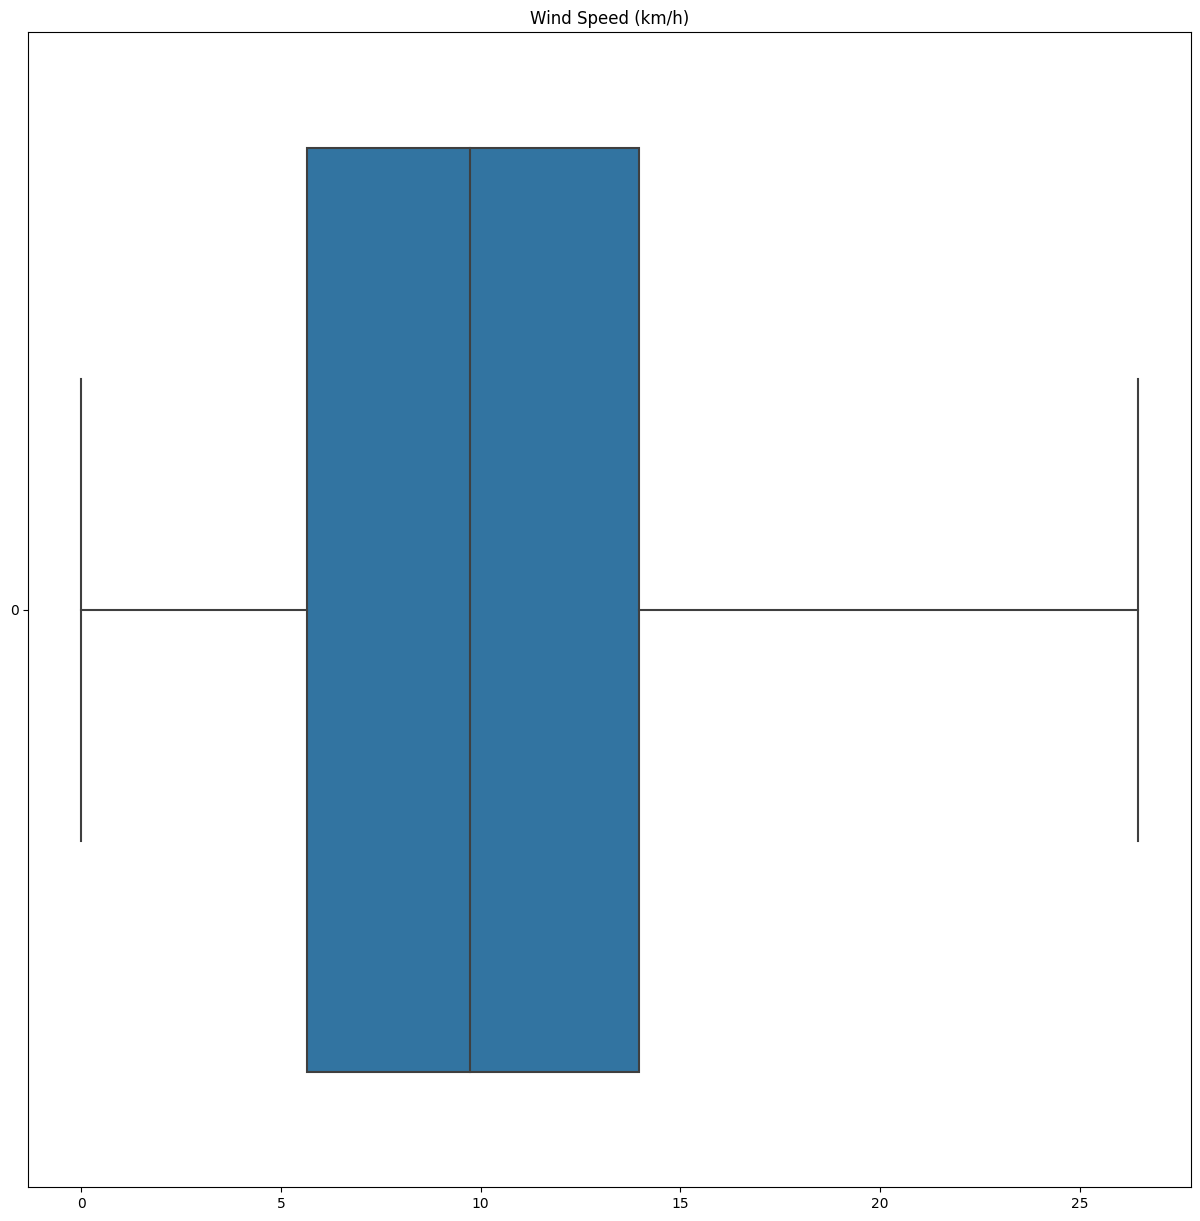

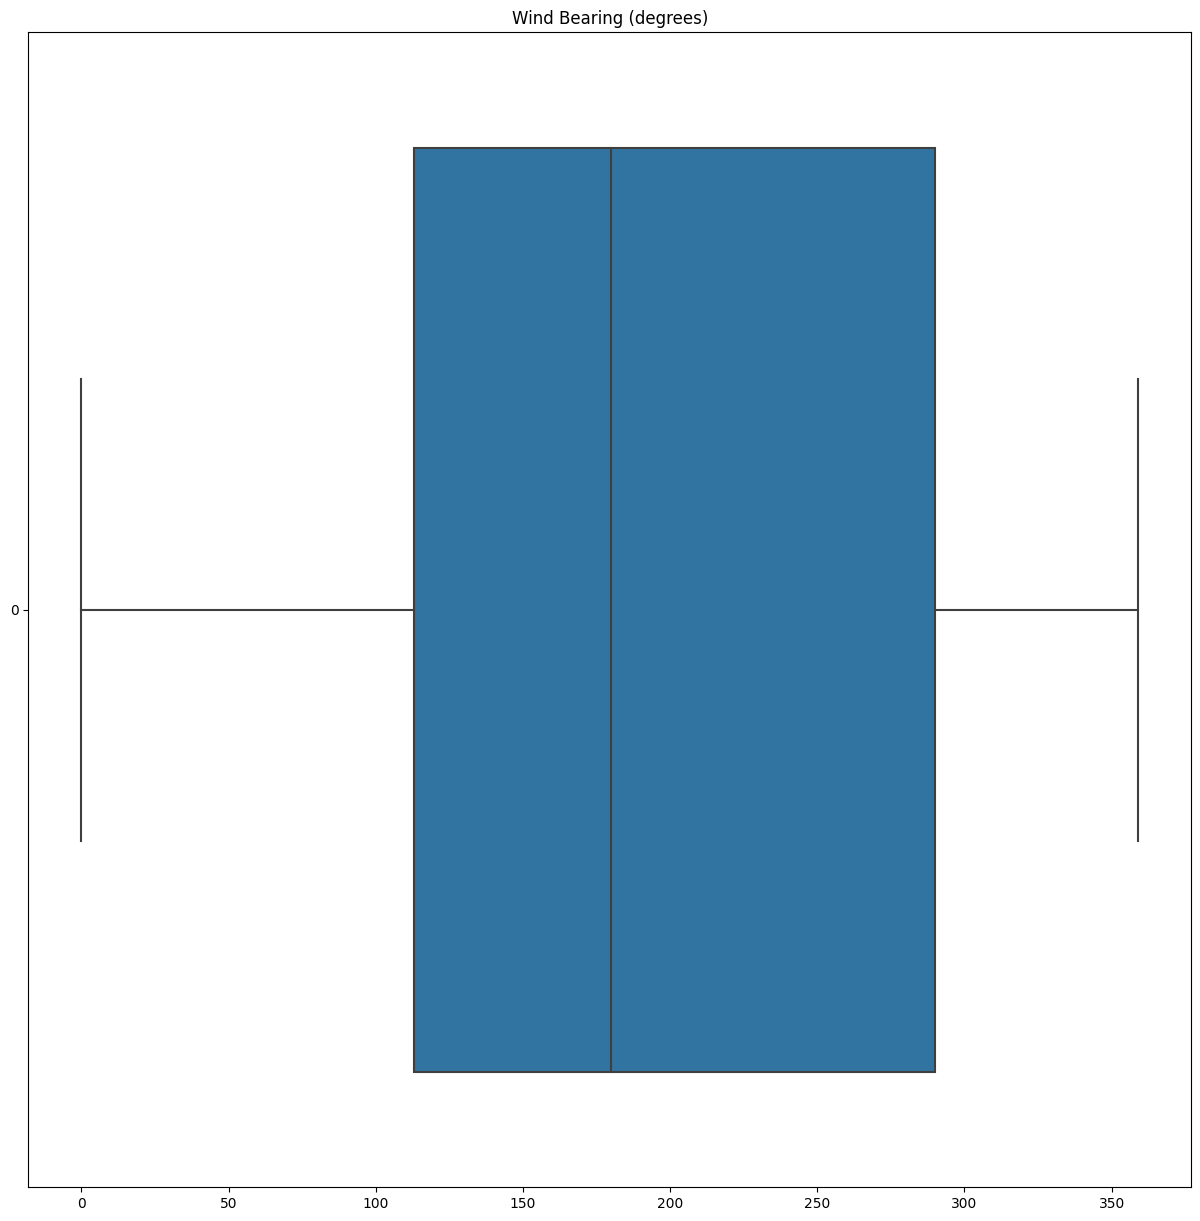

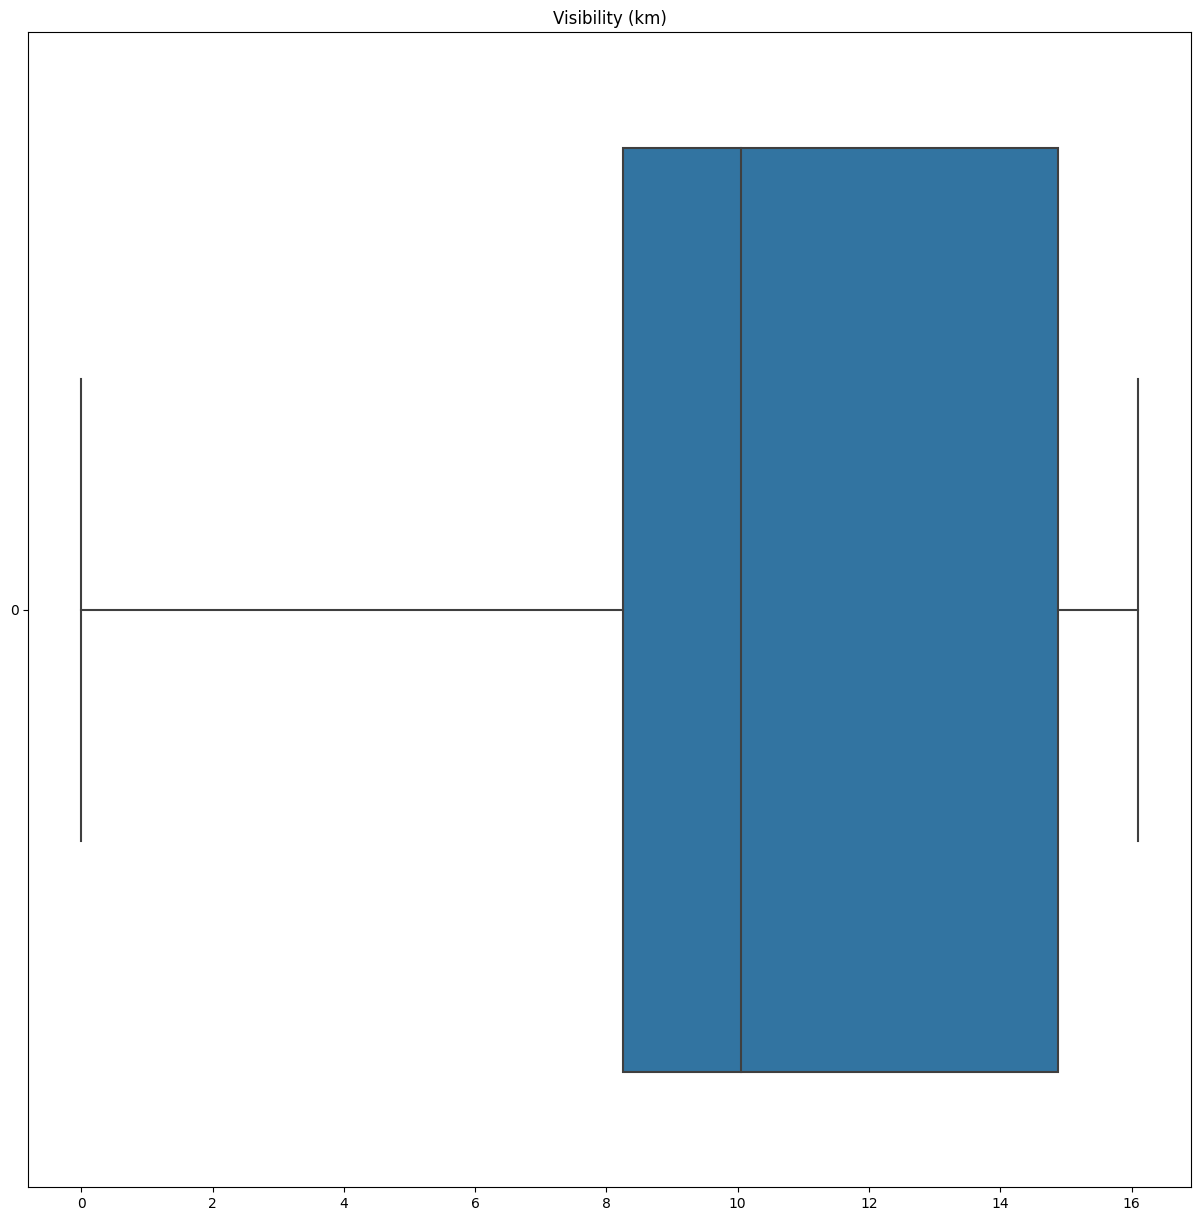

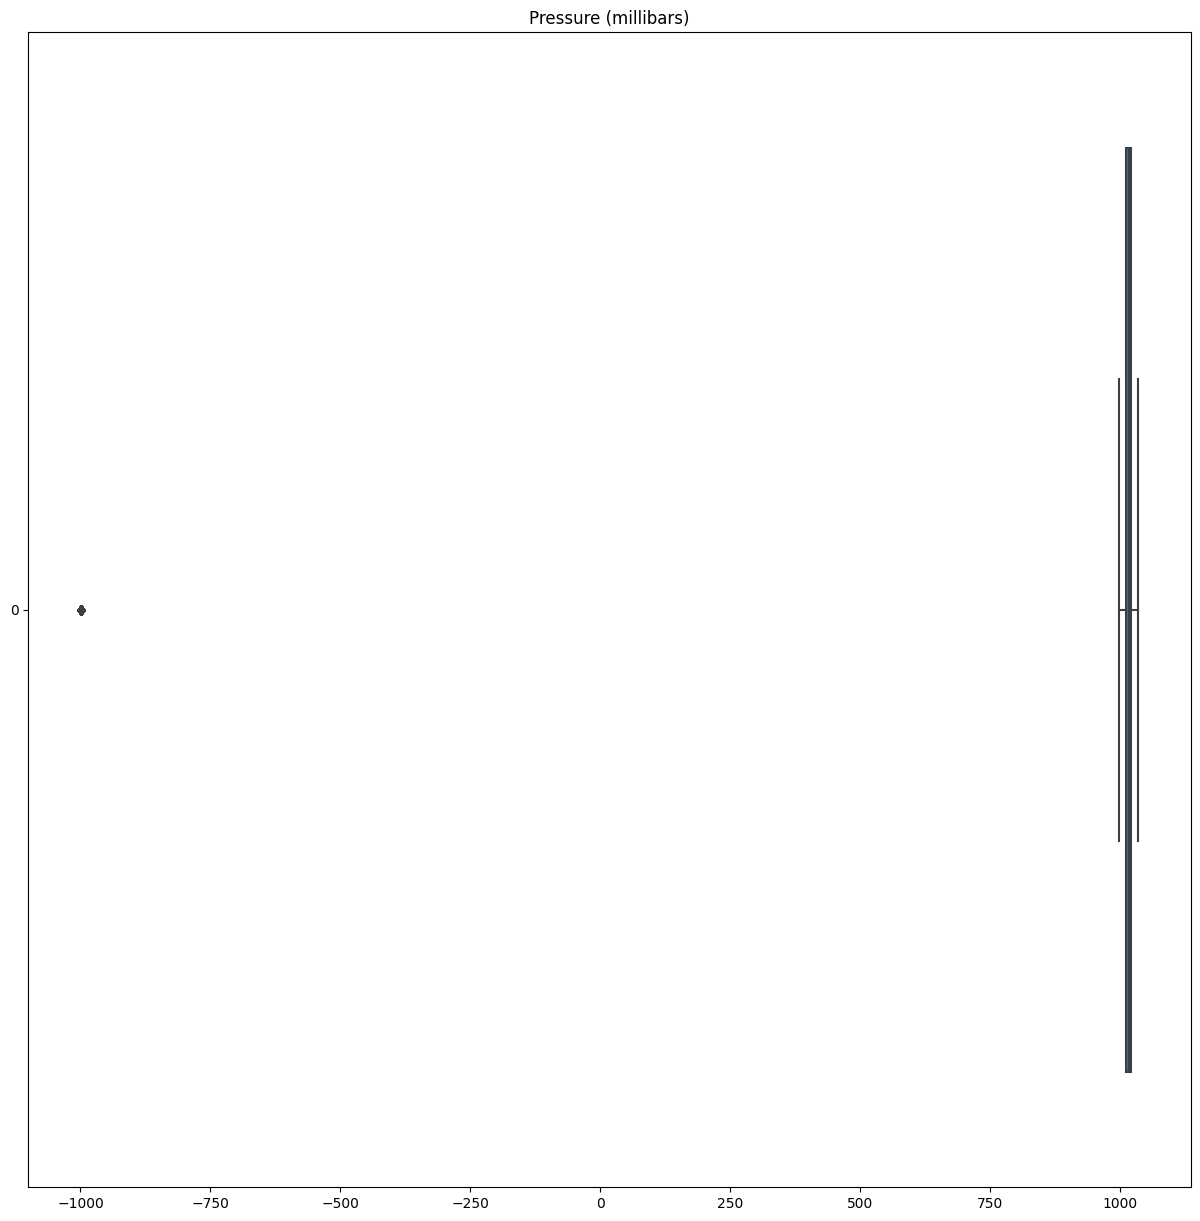

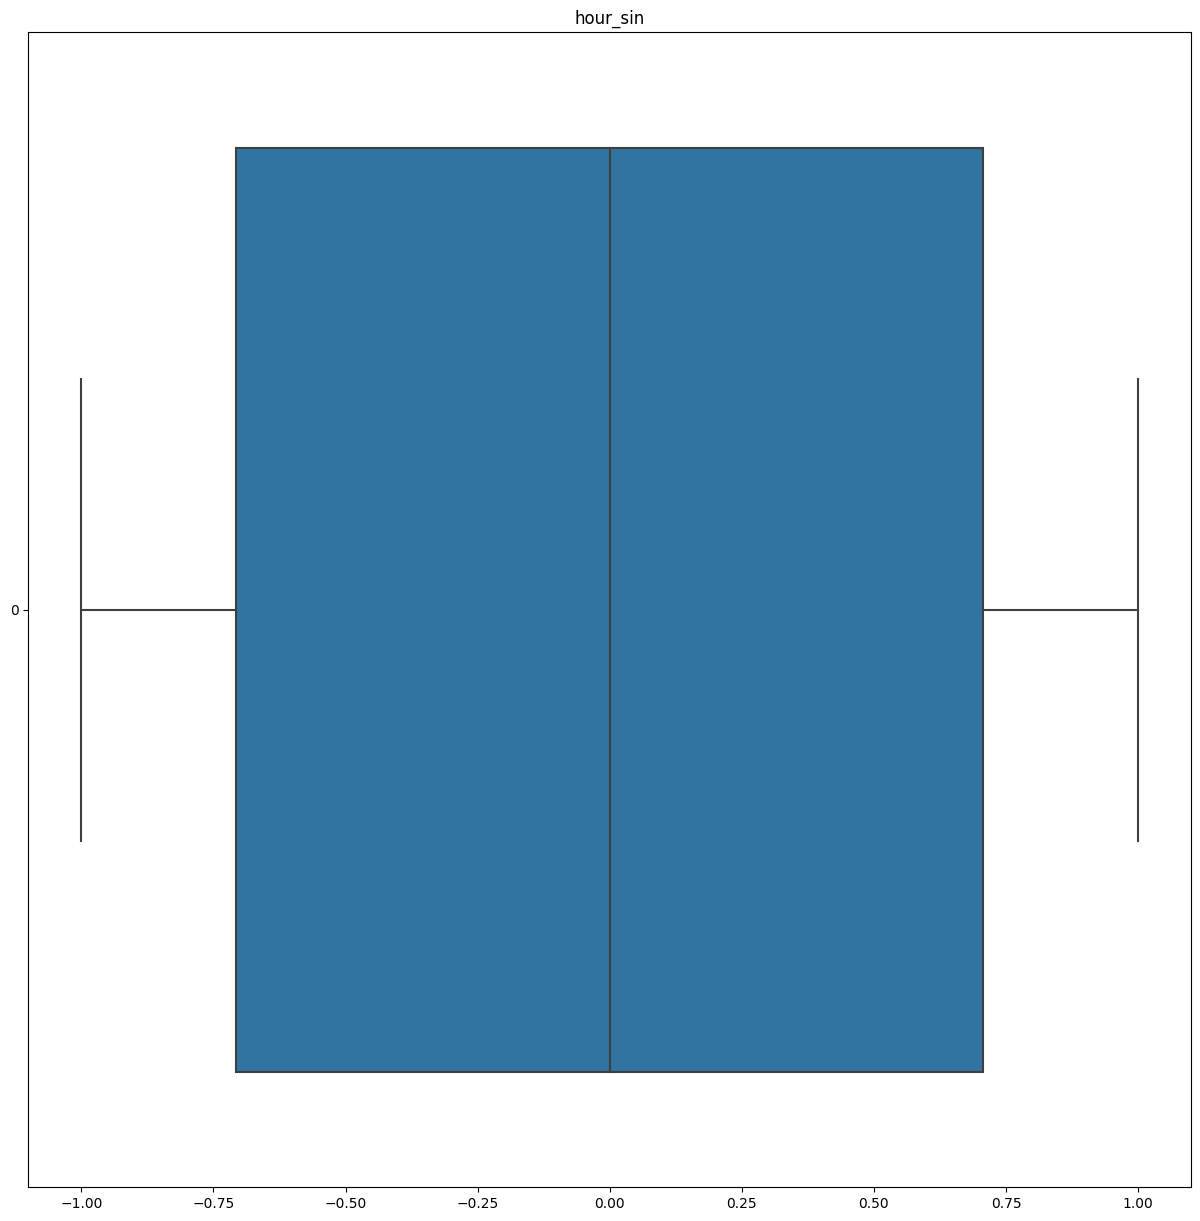

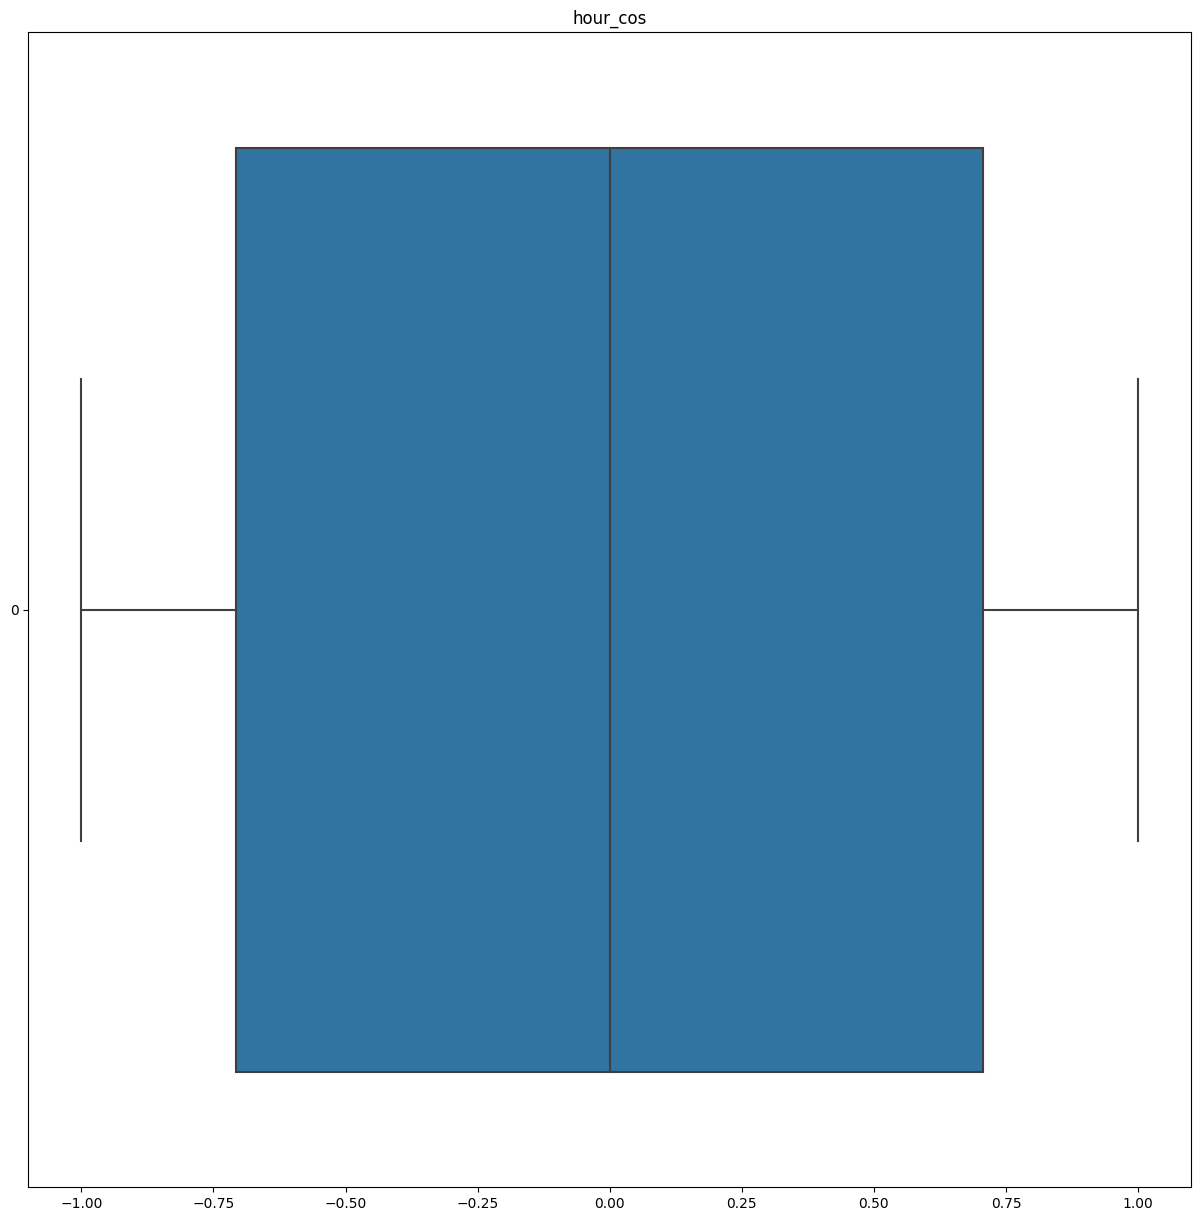

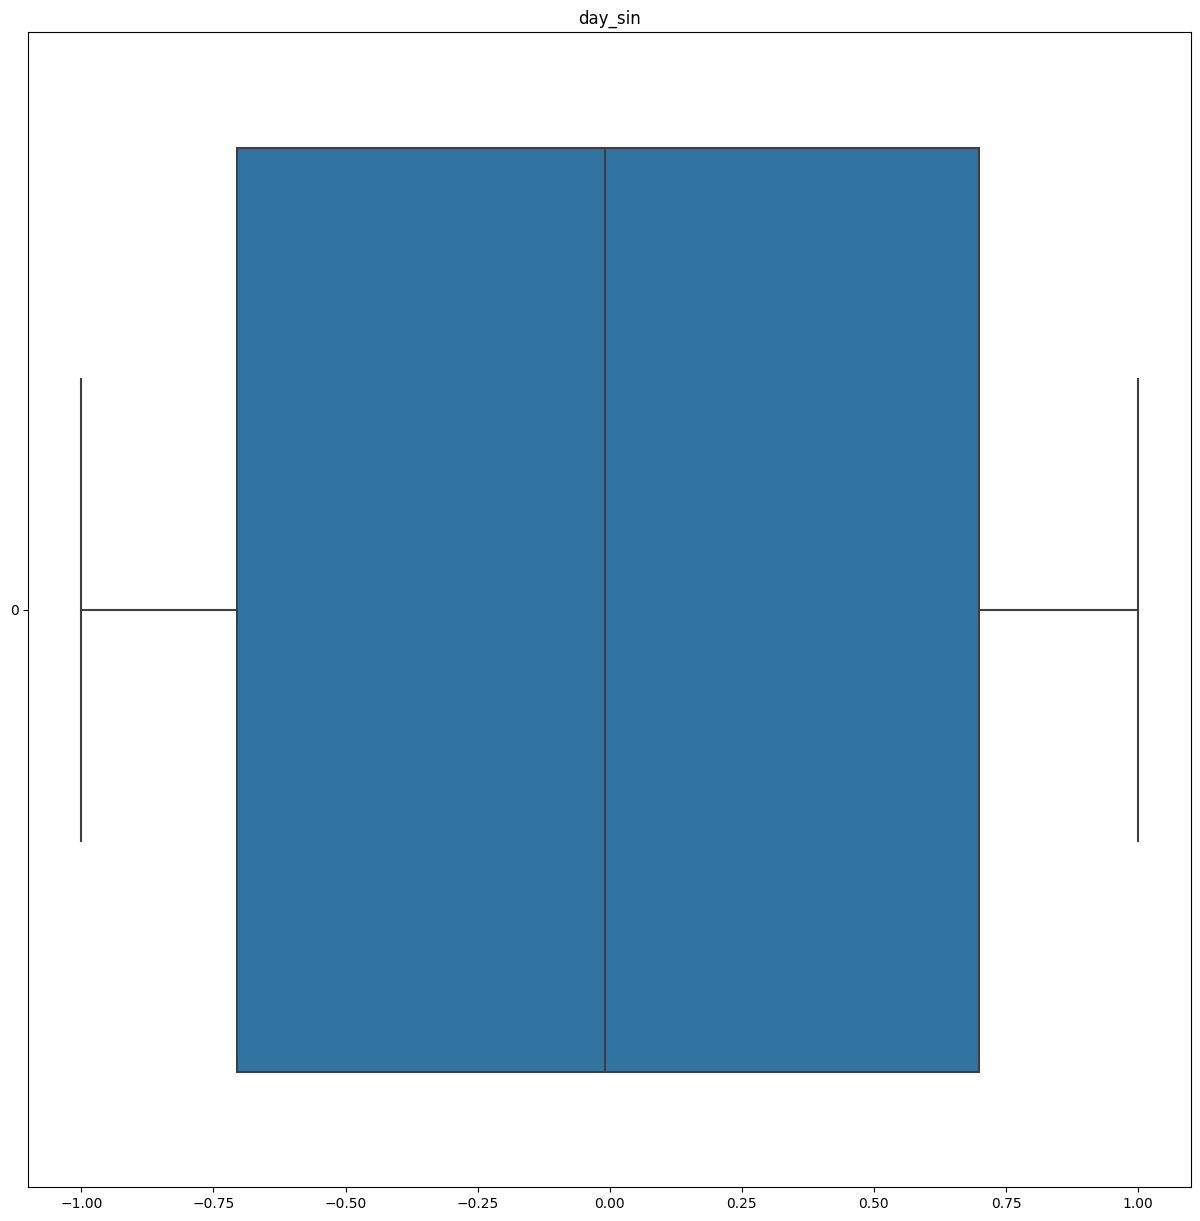

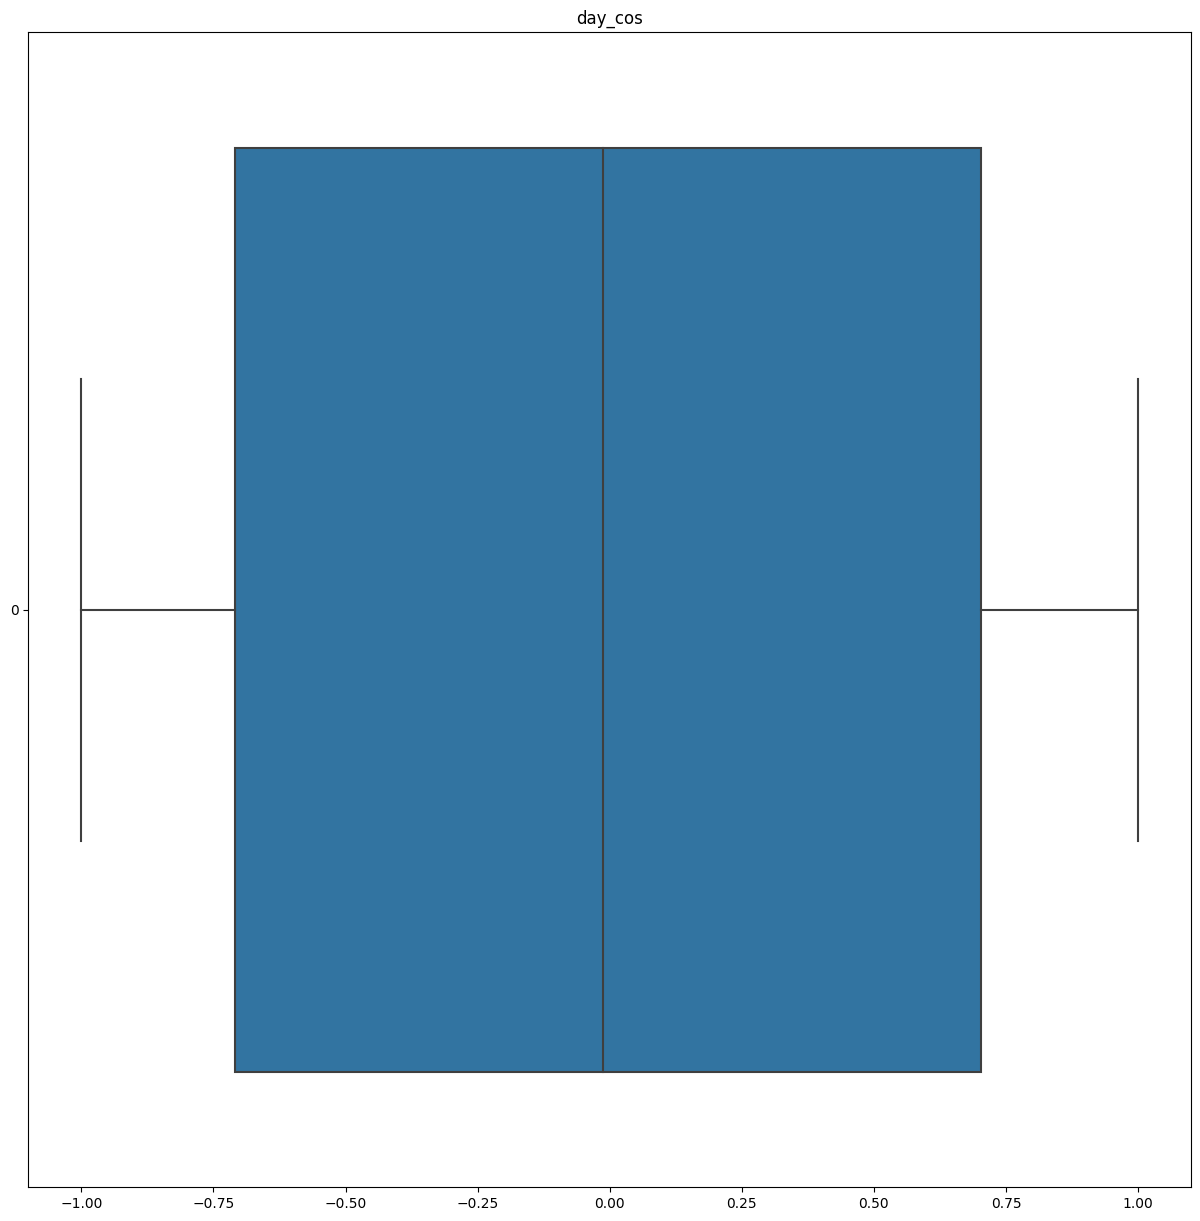

<Figure size 1500x1500 with 0 Axes>

In [40]:
for feature in column_views[1:]: 
    sns.boxplot(new[feature], orient='h')
    plt.title(feature)
    plt.figure(figsize=(15,15))

Precip Type


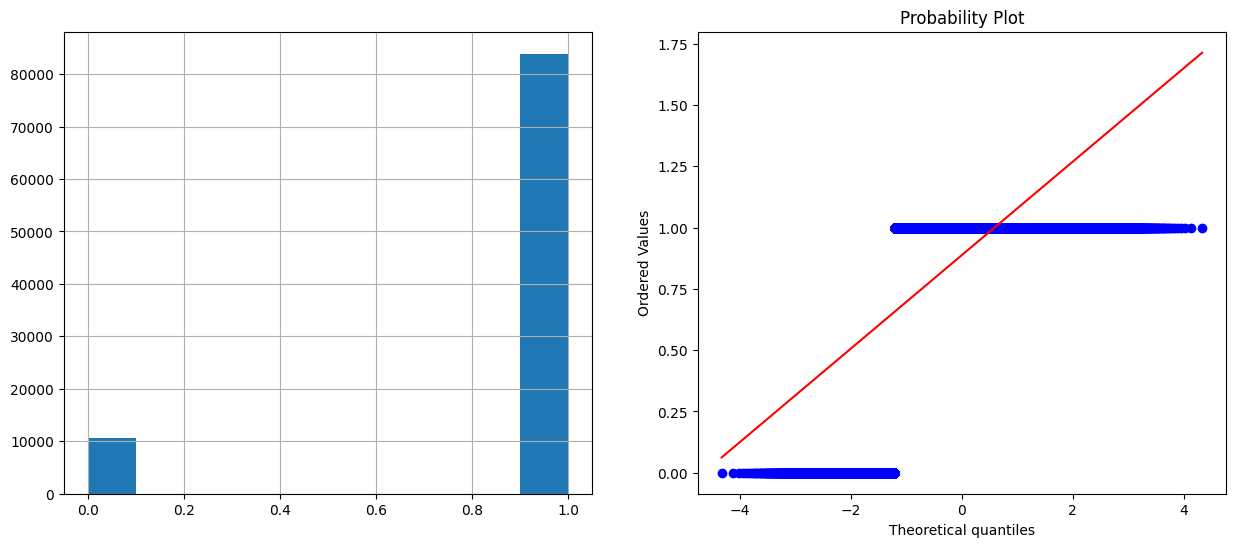

Temperature (C)


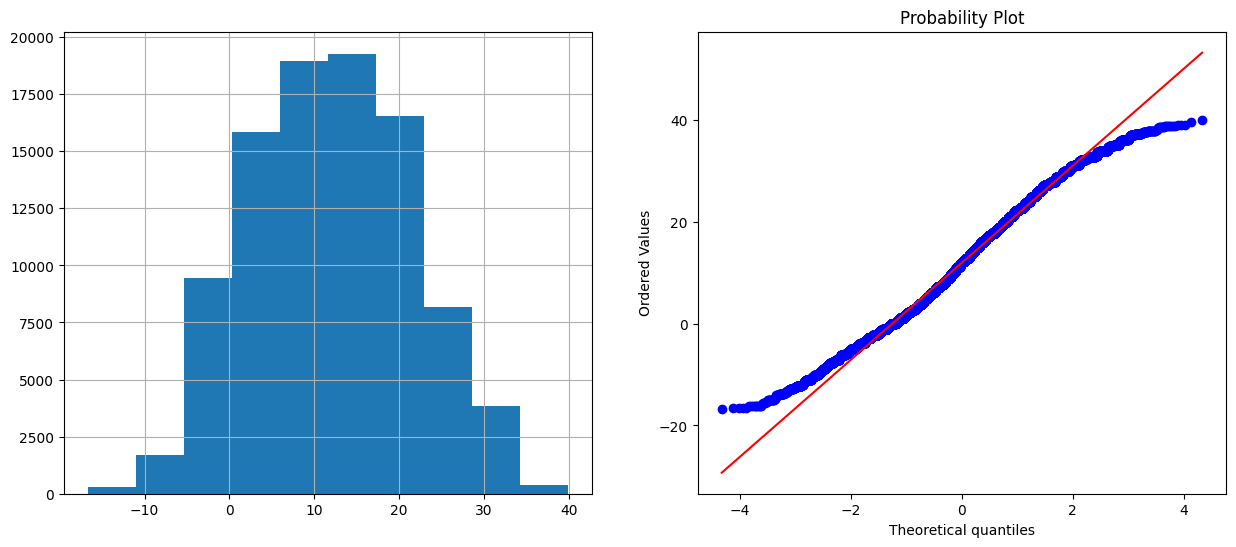

Humidity


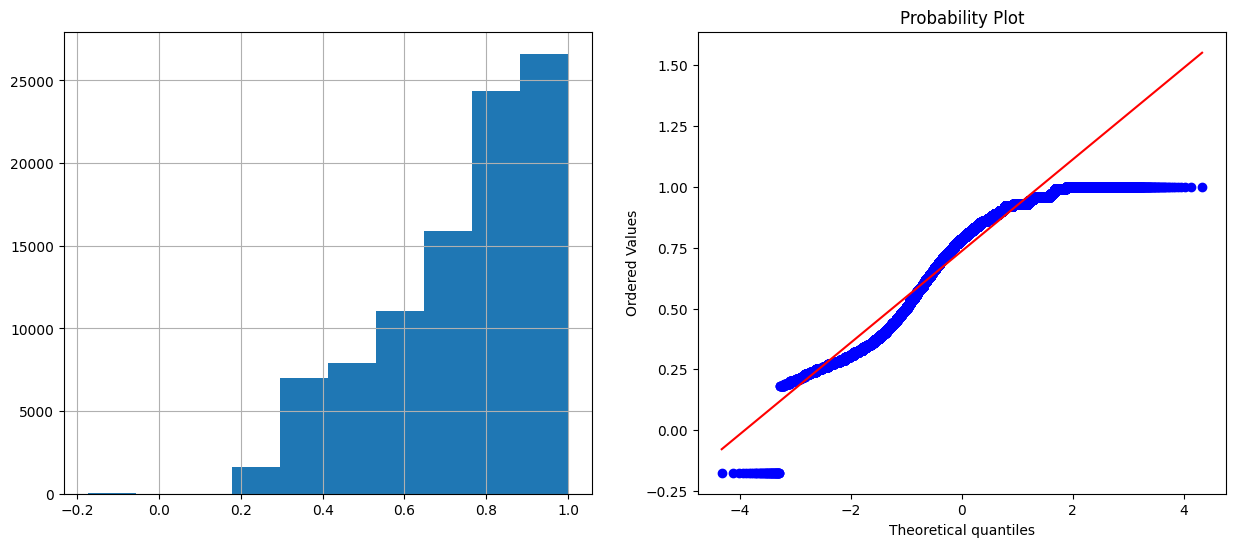

Wind Speed (km/h)


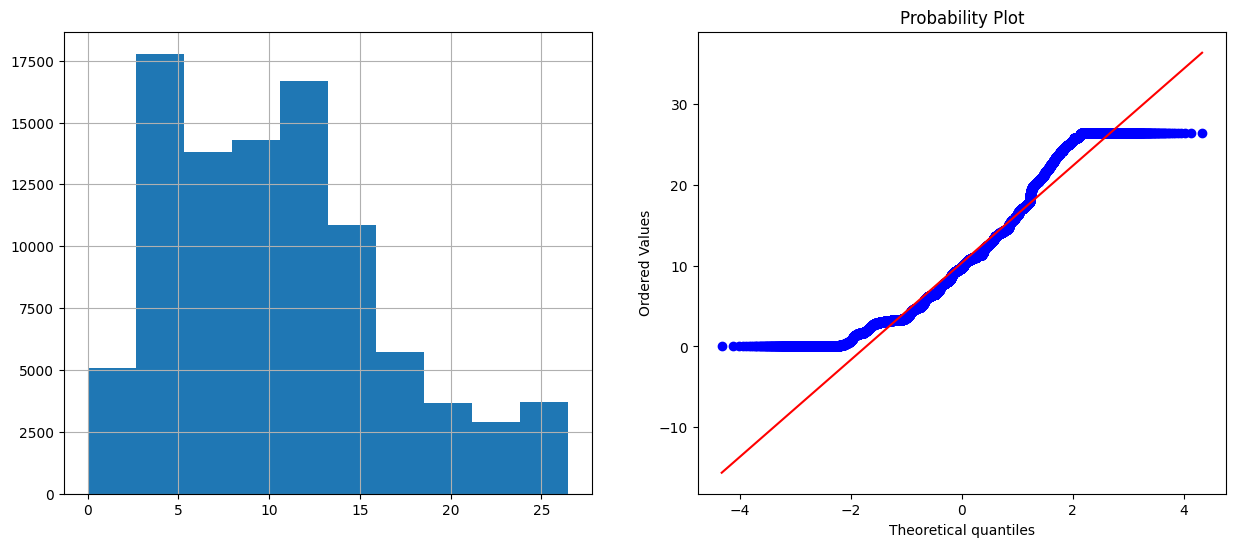

Wind Bearing (degrees)


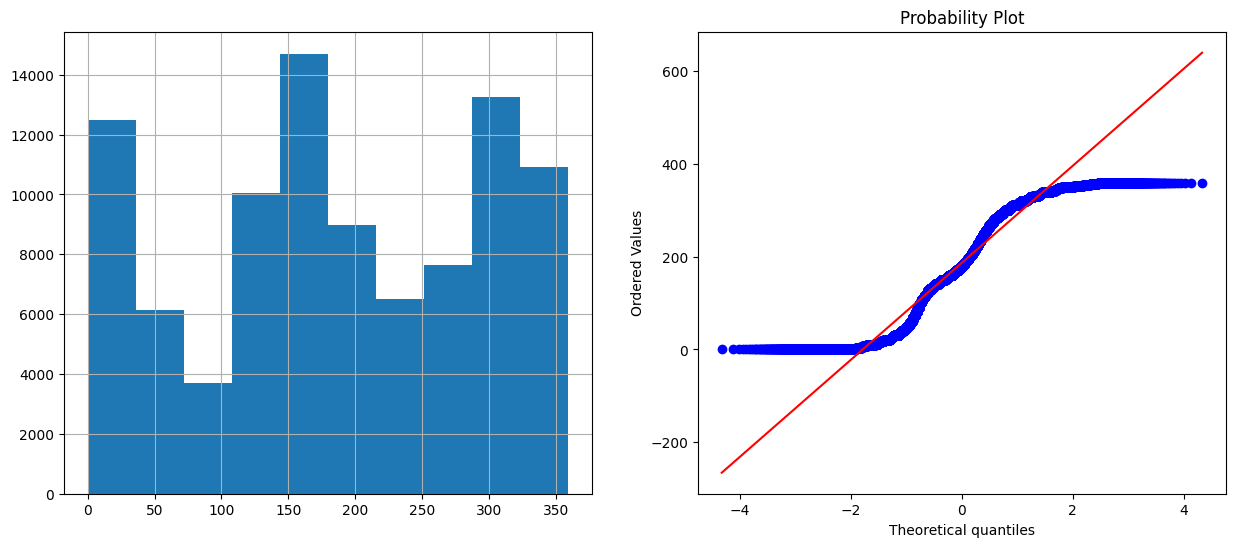

Visibility (km)


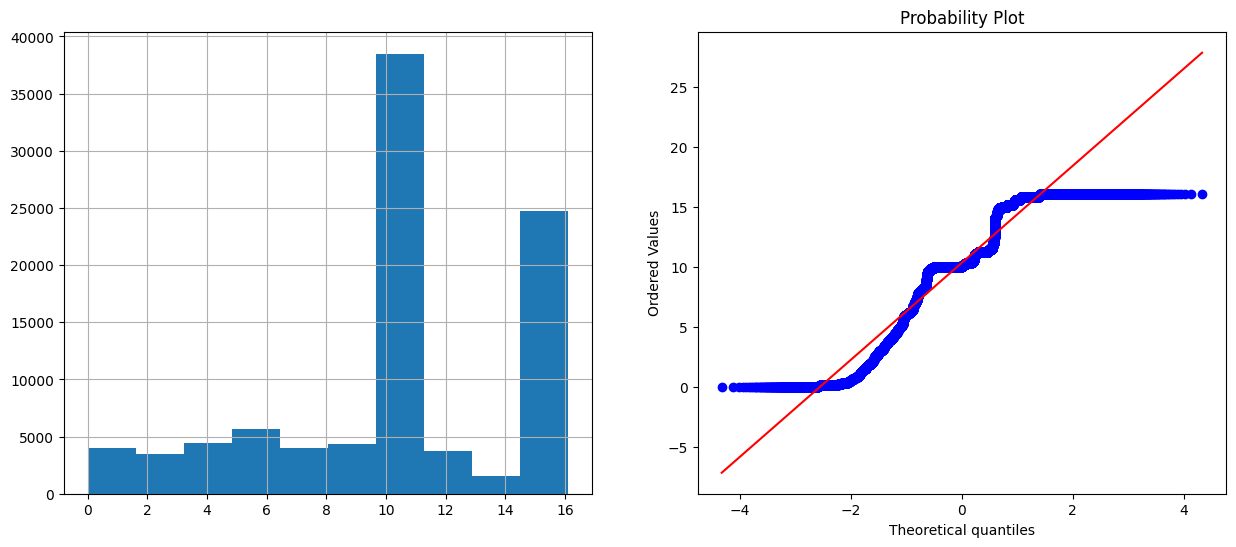

Pressure (millibars)


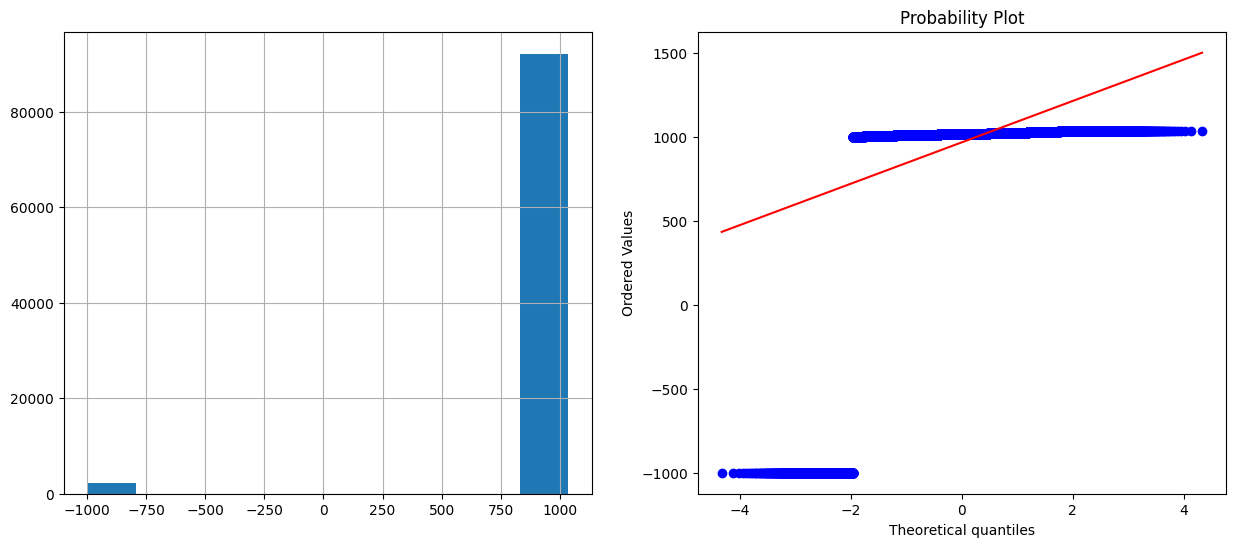

hour_sin


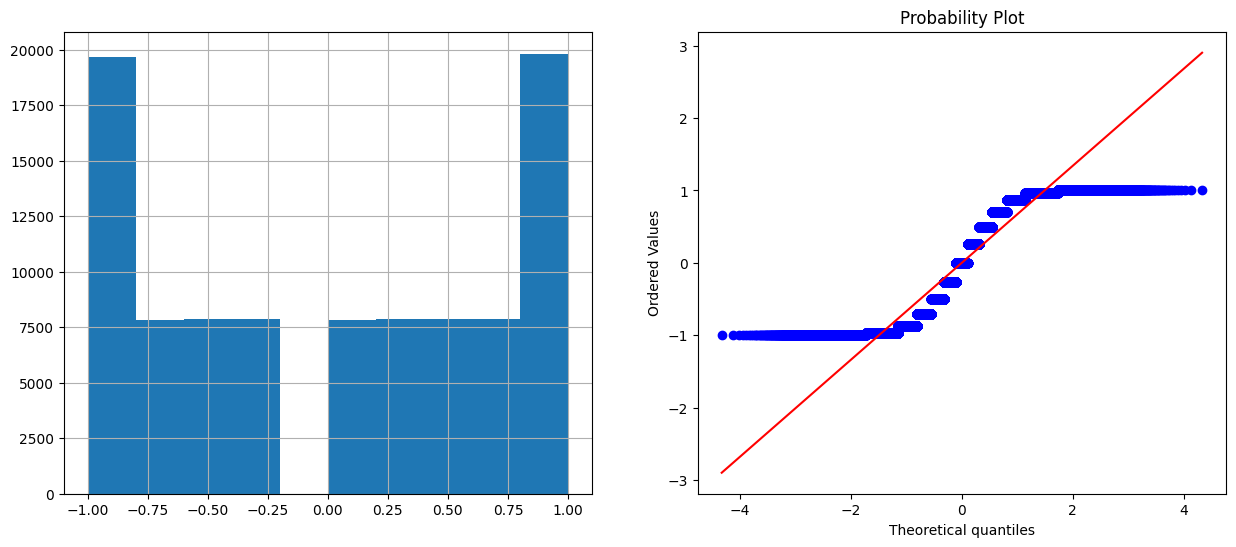

hour_cos


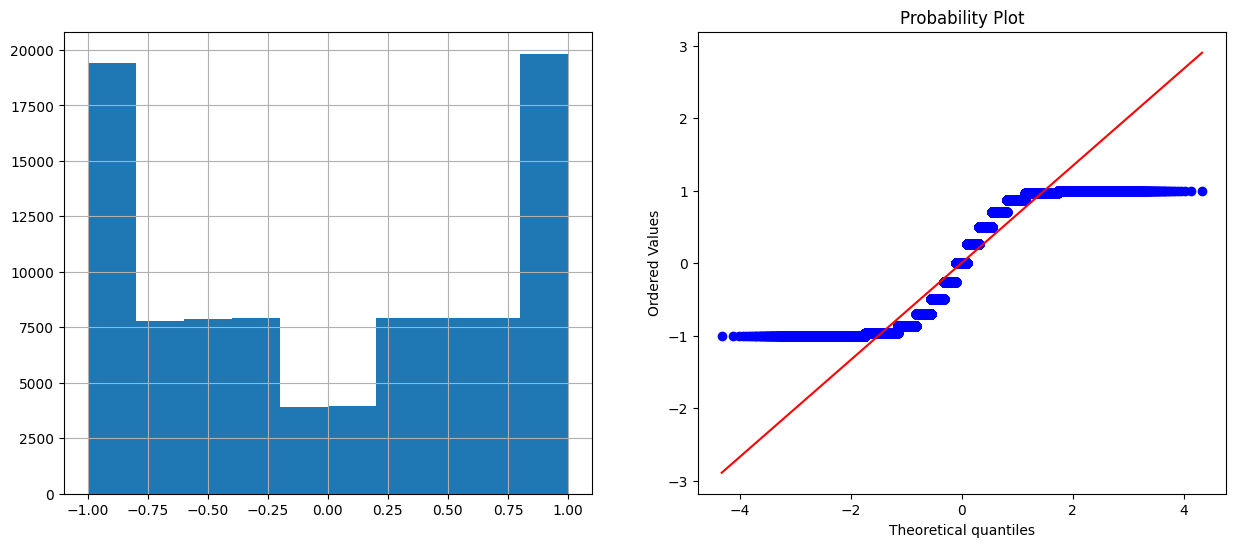

day_sin


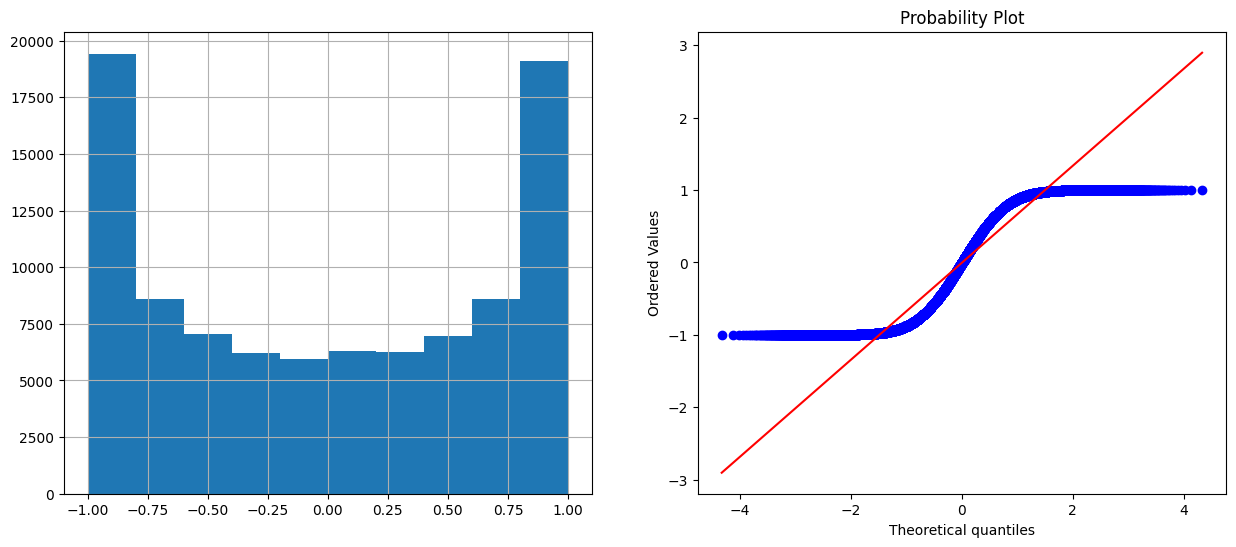

day_cos


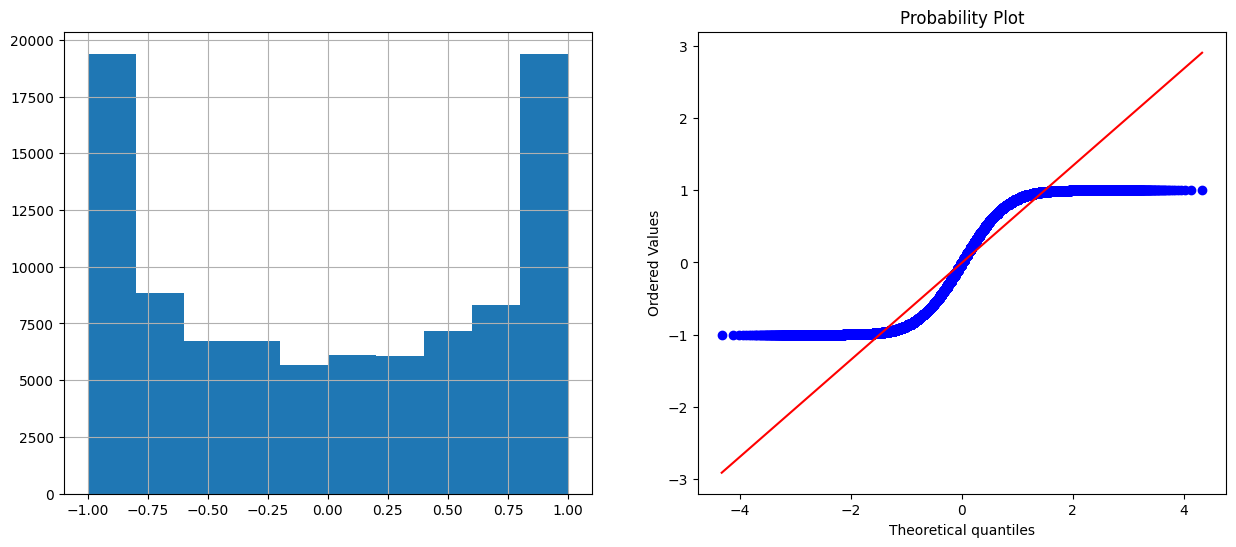

In [41]:
for feature in column_views[1:]:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    new[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(new[feature], dist="norm", plot=plt)
    plt.show()

In [42]:
new.to_csv("weather_dataset/preprocessed_1_time.csv", index=False)

In [27]:
new

Summary  Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0          1.0            1         9.472222      0.89            14.1197   
1          1.0            1         9.355556      0.86            14.2646   
2          2.0            1         9.377778      0.89             3.9284   
3          1.0            1         8.288889      0.83            14.1036   
4          2.0            1         8.755556      0.83            11.0446   
...        ...          ...              ...       ...                ...   
96448      1.0            1        26.016667      0.43            10.9963   
96449      1.0            1        24.583333      0.48            10.0947   
96450      1.0            1        22.038889      0.56             8.9838   
96451      1.0            1        21.522222      0.60            10.5294   
96452      1.0            1        20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                       251.0          15.8263               1015.13  
1                       259.0          15.8263               1015.63  
2                       204.0          14.9569               1015.94  
3                       269.0          15.8263               1016.41  
4                       259.0          15.8263               1016.51  
...                       ...              ...                   ...  
96448                    31.0          16.1000               1014.36  
96449                    20.0          15.5526               1015.16  
96450                    30.0          16.1000               1015.66  
96451                    20.0          16.1000               1015.95  
96452                    39.0          15.5204               1016.16  

[94462 rows x 8 columns]

In [28]:
new.iloc[43870]

Summary                      4.000000
Precip Type                  1.000000
Temperature (C)             28.938889
Humidity                     0.450000
Wind Speed (km/h)           11.189500
Wind Bearing (degrees)     152.000000
Visibility (km)              9.982000
Pressure (millibars)      1017.850000
Name: 44818, dtype: float64

In [29]:
new.isna().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [30]:
new.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Length: 94462, dtype: bool

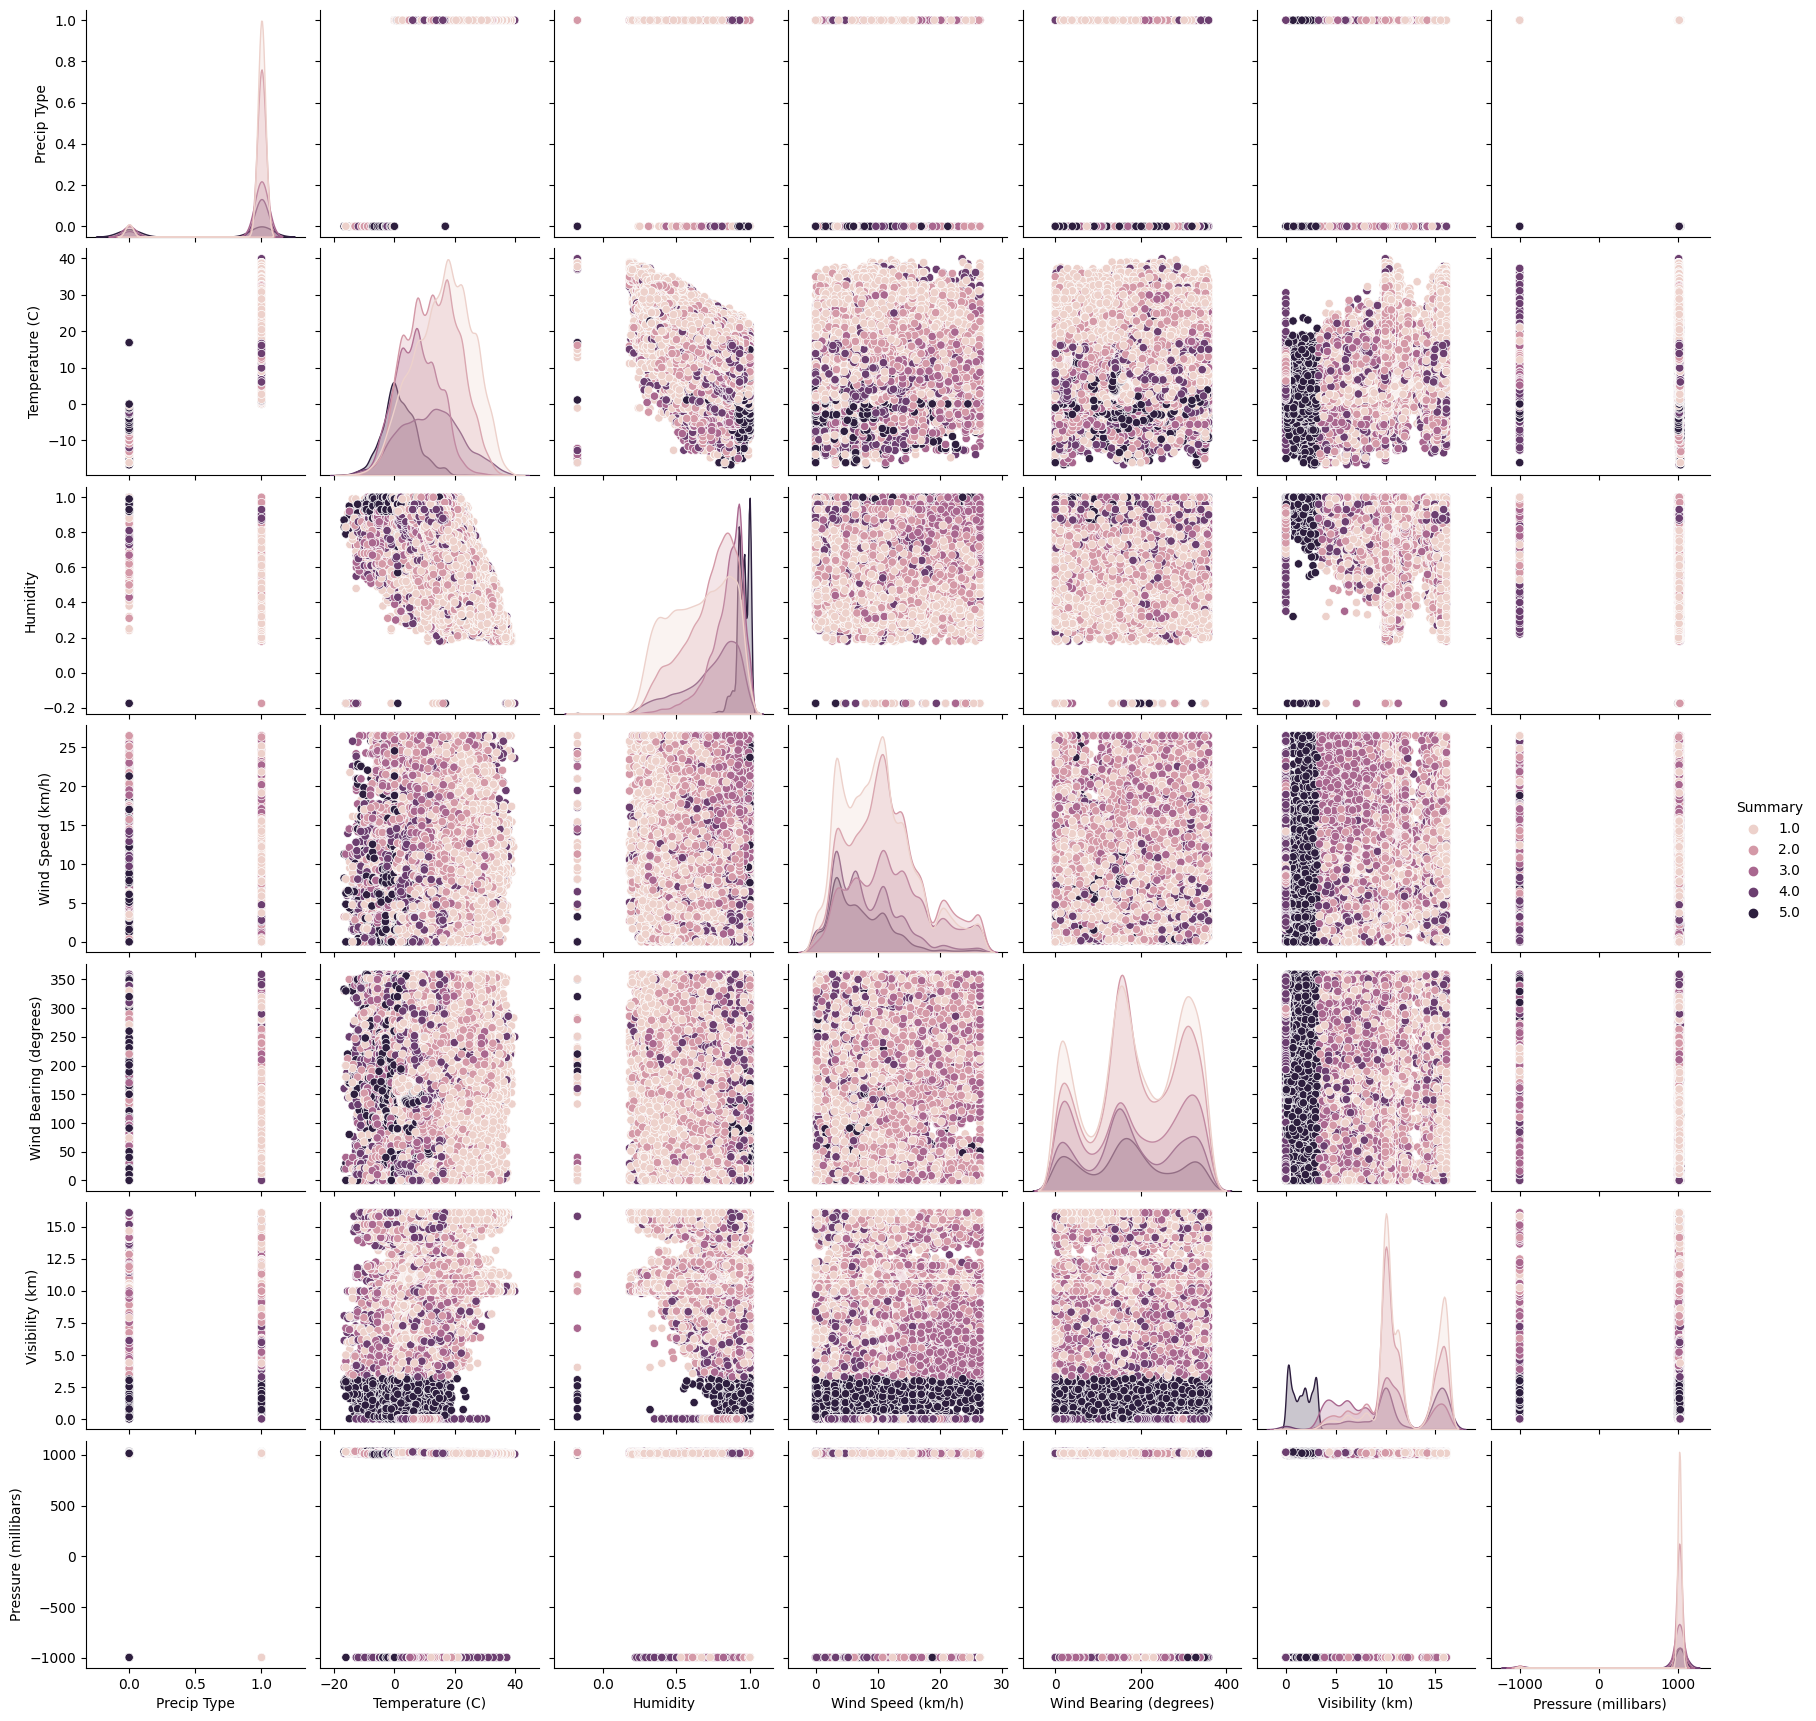

In [31]:
#sns.pairplot(new,hue="Summary")

In [ ]:
#twitter=pd.read_csv('tweets.csv')

In [ ]:
#twitter

In [ ]:
#hashtags=twitter['hashtags']
#hashtags[478047]

In [33]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(new).transform(new.astype(float))

In [34]:
X
 u 

array([[-1.03691831,  0.35514724, -0.26038384, ...,  0.59952093,
         1.30332308,  0.15253826],
       [-1.03691831,  0.35514724, -0.27259306, ...,  0.67407173,
         1.30332308,  0.15413763],
       [-0.23765778,  0.35514724, -0.27026749, ...,  0.16153498,
         1.09677486,  0.15512924],
       ...,
       [-1.03691831,  0.35514724,  1.05472349, ..., -1.45994489,
         1.36834752,  0.15423359],
       [-1.03691831,  0.35514724,  1.00065409, ..., -1.55313339,
         1.36834752,  0.15516122],
       [-1.03691831,  0.35514724,  0.88728277, ..., -1.37607524,
         1.23064871,  0.15583296]])